## Исследование данных о российском кинопрокате

**Цель исследования**: Оценка рынка российского кинопроката и того, как сильно на него влияет государственное участие. Поиск сильных и слабых черт кинопродукции, которая в той или иной степени финансируется государством. Выявление уровня интереса зрителей к фильмам с гос. участием.

**Ход работы**:

- Изучить датафрейм и исправить ошибки и недочёты в данных, где это возможно;
- Добавить в таблицу столбцы с дополнительными параметрами, которые помогут выполнить более точный анализ;
- По очищенным данным и при помощи новых столбцов провести анализ различных параметров киноиндустрии (общие затраты, окупаемость, преимущества и недостатки разных жанров и режиссёров).

### Шаг 1. Откроем файлы с данными и объединим их в один датафрейм. 

Объединим данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм.

In [49]:
# Импортируем pandas, matplotlib:
import pandas as pd
import matplotlib.pyplot as plt

# Загружаем данные о прокатных удостоверениях в датафрейм mkrf_movies:
mkrf_movies = pd.read_csv('/datasets/mkrf_movies.csv')
# Загружаем данные о прокате в российских кинотеатрах mkrf_shows:
mkrf_shows = pd.read_csv('/datasets/mkrf_shows.csv')

# Посмотрим всё ли верно загрузилось: 
display(mkrf_movies.head(5))

display(mkrf_shows.head(5))

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Всё ок. Однако при попытке объединить данные методами join и merge выясняется, что это невозможно сделать - общий столбец в обоих датафреймах содержит данные разного типа: в **mkrf_movies** столбец `puNumber` имеет тип строковый данных *object*, а в **mkrf_shows** аналогичный столбец имеет целочисленный тип *int64*. Более того, в датафрейме **mkrf_movies** столбец `puNumber` содержит в ряде записей слово *'нет'*, которое не преобразовать в *int64*. Поэтому, чтобы объединить два датафрейма в один, мы:

In [50]:
# Сначала заменяем в столбце puNumber все "нет" на 0:
mkrf_movies.loc[mkrf_movies['puNumber'] == 'нет', 'puNumber'] = 0
# Преобразуем тип столбца puNumber в датафрейме mkrf_movies в целочисленный:
mkrf_movies['puNumber'] = mkrf_movies['puNumber'].astype('int')
# Объединяем обе таблицы при помощи merge и общего столбца puNumber. Так как нам надо, объединить данные так, чтобы все объекты 
# из датасета mkrf_movies обязательно вошли в получившийся датафрейм, устанавливаем тип объединения left в параметрах merge: 
mkrf_merge = mkrf_movies.merge(mkrf_shows, on='puNumber', how='left')
# Проверяем, состоялось ли объединение таблиц:
mkrf_merge.head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Получили табличку, объединившую оба датафрейма. Но до анализа еще далеко. В первую очередь стоит провести работы по предобработке:
- Заменить типы данных там, где это более уместно;
- Просканировать датафрейм на аномальные значения и поработать с ними, если они обнаружатся;
- Обработать пропуски и дубли.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Посмотрим общую информацию об объединённой табличке и проверим типы данных в столбцах, вызвав метод `info`:

In [51]:
mkrf_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Итак, теперь у нас есть таблица со следующими столбцами:

* `title` — название фильма;
* `puNumber` — номер прокатного удостоверения;
* `show_start_date` — дата премьеры фильма;
* `type` — тип фильма;
* `film_studio` — студия-производитель;
* `production_country` — страна-производитель;
* `director` — режиссёр;
* `producer` — продюсер;
* `age_restriction` — возрастная категория;
* `refundable_support` — объём возвратных средств государственной поддержки;
* `nonrefundable_support` — объём невозвратных средств государственной поддержки;
* `financing_source` — источник государственного финансирования;
* `budget` — общий бюджет фильма;
* `ratings` — рейтинг фильма на КиноПоиске;
* `genres` — жанр фильма;
* `box_office` — сборы в рублях.

Метод `info` говорит нам, что помимо столбца `puNumber`, который мы уже преобразовали, некорректный тип данных есть в:
- `show_start_date` - дата требует преобразования из строчного типа данных в *datetime*;
- `ratings` - цифры рейтинга несомненно правильнее отображать при помощи вещественного типа данных *float*, а не строкового *object*.

#### Преобразуем тип данных, где его явно требуется изменить:

Преобразование требуется выполнить, поскольку некорректный тип данных может повлечь за собой ошибки в расчётах и, как следствие, неверные результаты исследования.

In [52]:
# Преобразовываем тип в show_start_date в datetime:
mkrf_merge['show_start_date'] = pd.to_datetime(mkrf_merge['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

Теперь посмотрим, что такого "строкового" есть в столбце `ratings`:

In [53]:
# Вызовем метод unique, который вернет все уникальные значения столбца:
mkrf_merge['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Часть значений прописана в процентах. Вероятно, это возникло по ошибке - зрители могли оценивать фильм не по 10-бальной шкале, а по тому, насколько из 100% им понравился фильм. Ошибку можно поправить, удалив "%" из некорректных значений и изменив тип данных, чтобы стало возможным заменить затронутые значения теми же цифрами, но поделенными на 10. Выполним следующее:

In [54]:
# Применив метод str.strip, укажем ему, что нам надо обрезать те строки, где с концов есть знак %:
mkrf_merge['ratings'] = mkrf_merge['ratings'].str.strip('%')

# # Выполним преобразование типа данных в столбце ratings методом to_numeric(). Поскольку в столбце есть неккоректные значения,
# вызовем параметр errors со значением coerce, чтобы принудительно заменить их на NaN:
mkrf_merge['ratings'] = pd.to_numeric(mkrf_merge['ratings'], errors='coerce')

# Сделаем замену значения на то же значение, поделённое на 10, посредством loc:
mkrf_merge.loc[mkrf_merge['ratings'] > 10, 'ratings'] = mkrf_merge.loc[mkrf_merge['ratings'] > 10, 'ratings'] / 10

# Снова вызовем unique, чтобы убедится, что всё заменилось корректно:
mkrf_merge['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

#### Шаг 2.2. Изучим пропуски в датафрейме и заменим их приемлемыми значениями, где это возможно

Проверим пропуски в датафрейме методом `isna()`:

In [55]:
print(mkrf_merge.isna().sum())

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64


Пропуски в столбцах `film_studio`, `production_country` и `director` есть, но их очень мало - на результаты они не повлияют. Их проще сразу удалить:

In [56]:
# Вызовем метод dropna и через параметр subset передадим ему названия колонок, где нужно удалить пропуски:
mkrf_merge = mkrf_merge.dropna(subset=['film_studio', 'production_country', 'director'])

На первый взгляд очень плохо обстоит дело в столцах `refundable_support`, `nonrefundable_support`, `budget` и `financing_source` - в них пропуски достигают 95.5% датафрейма. Однако столбец `budget` предполагает, что данные в нём указаны только для тех фильмов, которые получили государственную поддержку. Пропуски в остальных столбцах явно связаны с ним потому, что:
- `refundable_support` — это объём возвратных средств **государственной поддержки**;
- `nonrefundable_support` — это объём невозвратных средств **государственной поддержки**;
- `financing_source` — это источник **государственного финансирования**;

То есть, все эти столбцы предполагают, что если есть гос. поддержка - есть данные, нет гос. поддержки (фильм от государства получил 0) - нет данных. На это же указывает и то, что в датафрейме дефицит данных у всех этих столбцов одинаков - то есть, потери в них почти наверняка связаны одной причиной - либо отсутствием гос. поддержки, как таковой, либо единовременной потерей данных. Поэтому везде, кроме столбца `financing_source`, заполним все пропущенные значения нулями. Пропуски в `financing_source` заполним фразой "*Нет данных*":

In [57]:
# Заполняем столбцы выбранными значениями методом fillna:
mkrf_merge[['nonrefundable_support', 'refundable_support', 'budget']] = (
    mkrf_merge[['nonrefundable_support', 'refundable_support', 'budget']]
    .fillna(0)
)

mkrf_merge['financing_source'] = mkrf_merge['financing_source'].fillna('Нет данных')

# переведем столбцы с вещественным типом в целочисленный тип:
mkrf_merge[['nonrefundable_support', 'refundable_support', 'budget']] = (
    mkrf_merge[['nonrefundable_support', 'refundable_support', 'budget']]
    .astype('int')
)

Сложнее обстоит дело с другими столбцами:
- `producer` - пропущено 7.59% значений.
- `ratings` - пропущено 13.3% значений.
- `genres` - пропущено 13 % значений.
- `box_office` - пропущено 58% значений.

Во всех этих столбцах большой объём информации, который может повлиять на результат исследования, поэтому пропуски в них нельзя просто удалить.

Сложно сказать почему они возникли. К примеру, в столбце `ratings` на момент составления датафрейма данных по рейтингу фильма могло не быть. Или сам фильм неизвестен и не собрал достаточного количества данных для расчета рейтинга. Логично будет заполнить значения рейтинга в таком случае нулями, которые в некоторых расчетах будем изымать срезами.

Часть пропусков в `box_office` точно возникла по причине объединения таблиц - там, где на прокатные удостоверения (`puNumber`) не было информации в датафрейме **mkrf_shows**, возникли пропуски. Также, вероятна ситуация, что фильм не выходил в широкий прокат - снимался для показов на дисках, в онлайн-сервисах, с образовательными и прочими некоммерческими целями и т.д., поэтому сборов у него, как таковых, нет и быть не может. Оглядываясь на это, в пропусках проставим нули.

Наконец, столбцы `producer` и `genres` могли не посчитать нужным заполнить. Заменить их особо нечем - ни среднее, ни медиана не смогут вычислить какой в среднем был продюсер или жанр у фильма. Можно проставить "*Неизвестно*" в данных столбцах, чтобы NaN не мешало коду.

Также, во всех случаях вероятен сбой записи, когда часть данных попросту потерялась.

In [58]:
# Заполняем выбранные столбцы желаемыми значениями при помощи fillna:
mkrf_merge[['box_office', 'ratings']] = (
    mkrf_merge[['box_office', 'ratings']]
    .fillna(0)
)

mkrf_merge[['producer', 'genres']] = (
    mkrf_merge[['producer', 'genres']]
    .fillna('Неизвестно')
)

# Изменим тип float в box_office на более удобный для отображения int:
mkrf_merge['box_office'] = mkrf_merge['box_office'].astype('int')

# Проверим, что получилось после очистки пропусков:
print(mkrf_merge.isna().sum())

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64


Пропуски, которые могли помешать нам в расчетах, устранены.

#### Шаг 2.3. Изучим дубликаты в датафрейме

##### Проверим наличие явных дубликатов в датафрейме:

In [59]:
mkrf_merge.duplicated().sum()

0

На первый взгляд явных проблем нет. Но нам ещё нужно просканировать дубликаты в отдельных столбцах, где дубликатов точно быть не должно. Проверим столбец `title`:

In [60]:
mkrf_merge['title'].duplicated().sum()

713

Количество довольно не маленькое! Почему же они возникли? Проверим с помощью такого метода:

In [61]:
# Загоним все значения столбца title в переменную titles:
titles = mkrf_merge['title']
# Используем функцию isin в сочетании с duplicated, чтобы проверить есть ли дубли в столбце title. После чего, если они есть, 
# функция sort_values отсортирует их по названию и выведет на экран:
mkrf_merge[titles.isin(titles[titles.duplicated()])].sort_values('title')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
454,100 миллионов евро,221024616,2016-05-25 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0,0,0,Нет данных,6.1,комедия,0
455,100 миллионов евро,121013712,2012-06-06 12:00:00+00:00,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0,0,0,Нет данных,6.1,комедия,0
5058,127 часов,221069011,2011-05-18 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0,0,0,Нет данных,7.7,"триллер,биография,драма",0
4852,127 часов,121000811,2011-01-27 12:00:00+00:00,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0,0,0,Нет данных,7.7,"триллер,биография,драма",0
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19 12:00:00+00:00,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,0,0,0,Нет данных,6.7,"боевик,триллер,драма",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1811,Этим утром в Нью-Йорке,221033214,2014-08-20 12:00:00+00:00,Художественный,"Лэндскейп Интертейнмент, Форс Мажор, Проминент...",США,Фил Олден Робинсон,"Боб Купер, Тайлер Митчелл, Дэниэл Дж. Уолкер",«12+» - для детей старше 12 лет,0,0,0,Нет данных,6.2,"драма,комедия",1090
4071,Я ненавижу день святого Валентина,121002010,2010-02-04 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0,0,0,Нет данных,5.0,"мелодрама,комедия",0
4505,Я ненавижу день святого Валентина,221139210,2010-12-03 12:00:00+00:00,Художественный,"Блю Стар Пикчерз, Ай Хэйт Вдэй Продакшнз, Ай С...",США,Ниа Вардалос,"Доминик Йанно, Мэдлейн Шерак, Уильям Шерак",«16+» - для детей старше 16 лет,0,0,0,Нет данных,5.0,"мелодрама,комедия",0
1703,"Я, снова я и мама",121013116,2016-05-23 12:00:00+00:00,Художественный,"Гомон, Эль Джи Эм Продакшнз, Ректанль Продюксь...",Франция - Бельгия,Гийом Гальенн,"Жан-Батист Дюпон, Алис Жирар, Сирил Кольбо-Жюстен",«16+» - для детей старше 16 лет,0,0,0,Нет данных,6.3,"комедия,мелодрама,драма",0


Видим, что фильмы задублировались, скорее всего потому, что у них несколько прокатных удостоверений, выданных в разное время. С прокатными удостоверениями так получается потому, что со временем могут меняться владельцы авторских прав. Каждому новому владельцу нужно переоформлять удостоверение. Этим же объясняется и разный `box_office` у фильмов - один владелец прав "напоказывал" на одну сумму, выпустив фильм в один год, другой - на другую, выпустив этот же фильм в другой год и прокатав по другим площадкам.

Удалять дубли смысла нет - если удалим, то потеряем много информации по заработкам отдельных картин, которых в этих дублях немало - около 10% от датафрейма.

Кроме названий фильмов, уникальными должны быть значения прокатных удостоверений. Посмотрим так ли это:

In [62]:
mkrf_merge['puNumber'].duplicated().sum()

2

Найдено 2 дубля, вероятно, случайного происхождения по ошибке записи. Проверим, являются ли они реальными дубликатами (относятся ли к одному фильму):

In [63]:
# Выведем дубликаты в столбце puNumber на экран, как мы это сделали в прошлый раз:
nums = mkrf_merge['puNumber']
mkrf_merge[nums.isin(nums[nums.duplicated()])].sort_values('puNumber')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,0,Нет данных,7.4,"комедия,криминал",0
5068,Анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,Нет данных,6.8,"комедия,криминал",0
4638,Как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,0,Нет данных,7.0,"мелодрама,комедия",0
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,Нет данных,7.6,"драма,мелодрама,история",0


Несмотря на дубли в прокатном удостоверении, это разные фильмы. Трогать их не стоит.

#### Шаг 2.4. Изучим категориальные значения

##### Посмотрим, есть ли неявные дубликаты

В остальных столбцах нецелесообразно искать явные дубли - рейтинг, режиссер, жанры и т.д. у разных фильмов могут совпадать. Лучше поищем неявные дубликаты. Начнем со столбца `type`:

In [64]:
mkrf_merge['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Видим, что из-за лишнего пробела задвоилась пара типов: *Анимационный* и *Художественный*.

На самом деле столбец `type` не одинок - практически во всех категориальных значениях, а именно в стобцах:
- `production_country`
- `film_studio`
- `director`
- `producer`
- `title`

встречается такая же проблема - в строках есть лишние пробелы, которые делают явно неуникальные значения "уникальными".
В `title` вообще ряд проблем: где-то в конце названия проставлены точки, где-то - нет. Плюс некоторые пробелы представляют собой подчеркивание - _. 

От этих дублей надо избавиться. Чтобы понять эффективность наших действий, для начала выведем на экран количество всех якобы уникальных значений вышеперечисленных столбцов:

In [65]:
# Используем для этого len и unique, которые вернут нам количество уникальных элементов во всех вызванных столбцах:
print(len(mkrf_merge['production_country'].unique()))
print(len(mkrf_merge['title'].unique()))
print(len(mkrf_merge['film_studio'].unique()))
print(len(mkrf_merge['director'].unique()))
print(len(mkrf_merge['producer'].unique()))
print(len(mkrf_merge['type'].unique()))

950
6746
5485
4796
5330
8


In [66]:
# Для начала отдельно почистим столбец title - поскольку метод str.strip обрезает пробелы только с начала и конца строки, из-за
# точек и нижних подчеркиваний со строками типа 'Схватка _.' без параметров, указывающих, что именно удалять, ничего 
# нельзя будет сделать:
mkrf_merge['title'] = mkrf_merge['title'].str.strip('_.')
# str.strip() можно применить только к объектам типа Series. Чтобы автоматизировать процесс удаления лишних пробелов и не
# вызывать функцию к каждому столбцу, создадим цикл, который пройдёт по всем столбцам в списке и при помощи replace заменит все 
# найденные пробелы на один шаблонный:
for space in ['type', 'production_country', 'film_studio', 'director', 'producer', 'title']:
    mkrf_merge[space] = mkrf_merge[space].replace("\s+", " ", regex=True).str.strip()

# Оценим сколько теперь уникальных значений осталось в столбцах:
print(len(mkrf_merge['production_country'].unique()))
print(len(mkrf_merge['title'].unique()))
print(len(mkrf_merge['film_studio'].unique()))
print(len(mkrf_merge['director'].unique()))
print(len(mkrf_merge['producer'].unique()))
print(len(mkrf_merge['type'].unique()))

932
6651
5455
4785
5314
6


Результат налицо. Особенно здорово помогла очистка от неявных дублей столбцу `title` - это видно и по цифрам, и если вызвать `unique()` - названия без ненужных точек, пробелов и подчеркиваний смотрятся намного аккуратнее и не дублируют друг друга.

#### Шаг 2.5. Проверим количественные значения

Как писалось выше, `budget`, `refundable_support` и `nonrefundable_support` - столбцы, подразумевающие государственное финансирование фильма, где `budget` - общий бюджет фильма. Данные в `budget` указаны только для тех фильмов, которые получили от государства некую государственную поддержку. Кроме того, есть два вида этой самой гос. поддержки:
- **refundable_support** - деньги надо возвращать государству;
- **nonrefundable_support** - деньги переданы государством на безвозмездной основе.

То есть, данные в этих столбцах зависят друг от друга. А это значит, что если мы выделим эти столбцы в отдельную таблицу, вместе с заполненным столбцом `budget` обязательно должны быть данные хотя бы в одном из столбцов `refundable_support` и `nonrefundable_support`, так как фильм получил ту или иную гос. помощь. Если данные в `budget` есть, а два других столбца пустуют - значения аномальны.

Проверим эту гипотезу, используя интересующие нас столбцы и срез по условию:

In [67]:
budget_df = pd.DataFrame(mkrf_merge, columns=['budget', 'nonrefundable_support', 'refundable_support'])
print(budget_df.query('budget != 0 and (nonrefundable_support == 0 and refundable_support == 0)'))

Empty DataFrame
Columns: [budget, nonrefundable_support, refundable_support]
Index: []


Видим, что в датафрейме действительно нет подобных строк - для фильмов с заполненным `budget` указан хотя бы один тип гос. финансирования. Но проверить данные на корректность надо и с других сторон.

Теперь проверим такую гипотезу: если данных в `budget` нет, то они должны отсутствовать и в других столбцах, так как бюджет фильма не содержит никакого гос. финансирования. Если в `budget` пусто, а один или оба других столбца имеют данные - значения аномальны.

In [68]:
print(budget_df.query('budget == 0 and (nonrefundable_support !=0 | refundable_support !=0)'))

      budget  nonrefundable_support  refundable_support
2053       0               23000000                   0
2058       0               75000000                   0
2472       0               70000000            10000000
2532       0                      0            20000000
2615       0              100000000            60000000
2684       0               59000000                   0
2788       0               35000000                   0
2874       0                6000000                   0
3047       0               51000000            19000000
3565       0              250000000                   0
3675       0               20000000            20000000
3739       0               20000000            25000000
5673       0               40000000            20000000
5806       0               60000000            10000000
6008       0               40000000            40000000
6323       0              138969465                   0
6823       0              120000000            6

А вот таких аномальных строк уже 17.

Также, бюджет фильма не должен превышать объем финансирования. Равным ему быть может, но превышать - нет. 

Поэтому, если значения в `nonrefundable_support` и `refundable_support` и их сумма превышают `budget`, при условии, что у нас есть его данные (то есть, `budget` не равен 0) - данные аномальны. Проверим есть ли строки с таким условием в датафрейме:

In [69]:
print(
    budget_df
    .query('(budget != 0 and (budget < nonrefundable_support | budget < refundable_support)) \
    and budget < (nonrefundable_support + refundable_support)')
)

Empty DataFrame
Columns: [budget, nonrefundable_support, refundable_support]
Index: []


Таких данных нет.

По итогам проверки на аномальные значения, мы выделили 17 строк - это около 5% от заполненных 332 значений по гос. финансированию. Там, где в `budget` пусто, а один или оба других столбца имеют данные, заменим нули в `budget` суммами мер оказанной гос. поддержки:

In [70]:
# С помощью индексации находим интересующие нас значения и заменяем в них нули на общую сумму гос.поддержки:
mkrf_merge.loc[mkrf_merge['budget'] == 0, 'budget'] = mkrf_merge['refundable_support'] + mkrf_merge['nonrefundable_support']

# Убедимся, что строк с некорректными значениями больше нет в датафрейме:
print(mkrf_merge.query('budget == 0 and (nonrefundable_support !=0 | refundable_support !=0)'))

Empty DataFrame
Columns: [title, puNumber, show_start_date, type, film_studio, production_country, director, producer, age_restriction, refundable_support, nonrefundable_support, budget, financing_source, ratings, genres, box_office]
Index: []


#### Шаг 2.6. Добавим новые столбцы

##### Создадим столбец с информацией о годе проката:

In [71]:
# Используем аксессор dt.year, чтобы извлечь информацию о годе из даты премьеры фильма:
mkrf_merge['year_distrib'] = mkrf_merge['show_start_date'].dt.year

##### Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. 
В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [72]:
# Создаём функцию director_genres, которая разделит строки в интересующих нас столбцах на отдельные элементы списка при 
# обнаружении запятой. А затем вернет первый элемент в списке (под индексом 0):

def director_genres(word):
    d_g = word.split(',')
    return d_g[0]

# Применяем функцию к новым столбцам с именем главного режиссера и основным жанром фильма:
mkrf_merge['main_director'] = mkrf_merge['director'].apply(director_genres)
mkrf_merge['main_genre'] = mkrf_merge['genres'].apply(director_genres)

##### Создание столбца с долей гос. поддержки от общего бюджета фильма:

Чтобы посчитать какую долю от общего бюджета фильма занимает гос. поддержка, создадим новый столбец `gov_budget_percent` и ему присвоим получившиеся расчёты для каждого фильма:

In [73]:
# Сложим оба вида гос. поддержки, чтобы получить общую сумму гос. поддержки. Затем поделим её на весь бюджет и умножим на 100, 
# чтобы получить процентное значение, исключив из расчета те фильмы, где ноль гос. участия:
mkrf_merge['gov_budget_percent'] = (
    ((mkrf_merge['nonrefundable_support'] + mkrf_merge['refundable_support']) / mkrf_merge.query('budget != 0')['budget'])*100 
)

# Проверим корректность новых столбцов:
mkrf_merge.query('budget != 0').head(5)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year_distrib,main_director,main_genre,gov_budget_percent
1281,Пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0,26500000,79411900,Министерство культуры,8.1,"драма,мелодрама",365353,2013,А.Атанесян,драма,33.370314
1448,Бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0,26000000,37142857,Министерство культуры,0.0,Неизвестно,28140,2014,А.Якимчук,Неизвестно,70.000000
1498,Невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0,107847945,176023490,Фонд кино,5.3,"комедия,фантастика",19957031,2013,Р.Давлетьяров,комедия,61.269064
1524,БЕРЦЫ,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0,28000000,40574140,Министерство культуры,4.2,драма,55917,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.009473
1792,Братья Ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0,25000000,40015122,Министерство культуры,6.4,драма,232100,2014,М.Угаров,драма,62.476381


Видим, что добавленные столбцы появились в табличке и корректно работают. Можно приступать к исследованию.

### Шаг 3. Проведём исследовательский анализ данных

#### 3.1 Построим столбчатый график, чтобы посмотреть распределение годов выхода фильмов:

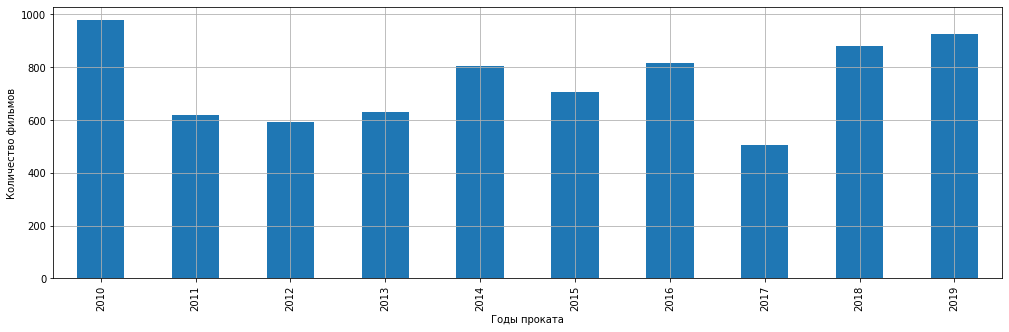

In [74]:
# К датафрейму mkrf_merge вызовем функцию pivot_table. Передав ей интересующие нас значения и "попросив" через aggfunc посчитать
# количество картин, построим график при помощи plot:
(
    mkrf_merge.pivot_table(index='year_distrib', values='box_office', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(17, 5), legend=None)
)
# выводим полученное значение на экран и подписываем оси:
plt.ylabel ("Количество фильмов")
plt.xlabel("Годы проката")
plt.show()

Видим, что больше всего фильмов вышло в 2010, 2018 и 2019 году. Также производительными выдались 2014, 2016 годы. В 2011 по 2013 включительно, а также в 2015 вышло нормальное, сравнительно одинаковое количество фильмов. Некоторая просадка есть в 2017 году.

Но это график для фильмов с прокатом везде - не только для тех картин, что вышли в кинотеатре. Для фильмов с прокатом в кино картина обстоит так:

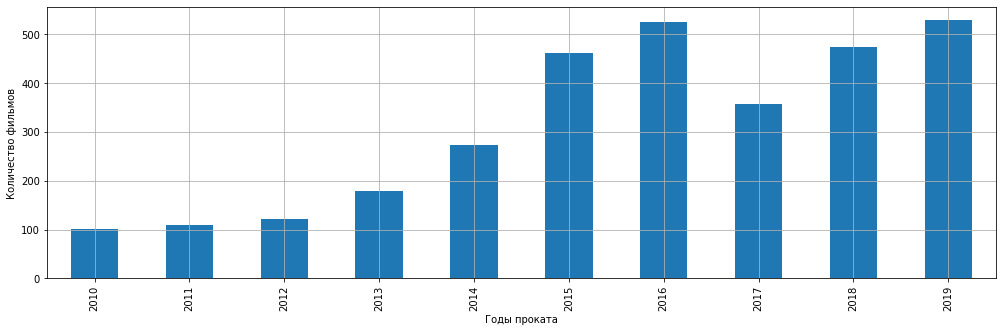

In [75]:
# К датафрейму mkrf_merge вызовем функцию pivot_table. Передав ей интересующие нас значения и "попросив" через aggfunc посчитать
# количество картин, построим график при помощи plot:
(
    mkrf_merge.query('box_office != 0').pivot_table(index='year_distrib', values='box_office', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(17, 5), legend=None)
)
# выводим полученное значение на экран и подписываем оси:
plt.ylabel ("Количество фильмов")
plt.xlabel("Годы проката")
plt.show()

Судя по всему, в датафрейме отсутствует много значений по фильмам, выходившим в кино с 2010-2013 год. Также некоторый недостаток данных есть и в 2014 году - значения этого года значительно ниже значений 2015-2019 годов без логичной причины.

Мысленно отбросив данные за 2010-2014 гг, проанализируем то, что у нас есть в гистограмме за 2015-2019 годы. Видим, что кинопроизводство дает примерно одинаковое количество фильмов: чуть меньше в 2015 и 2018 годах, и чуть больше в 2016 и 2019. Некоторая просадка наблюдалась в 2017 году - вероятно, она была связана с кризисом в Гильдии сценаристов, когда Голливуду грозила новая забастовка сценаристов, что привело к задержке выхода картин на экран. На эту гипотезу также намекает то, что уже в 2018 году был всплеск производства с продолжающимся ростом и в 2019 г.

Также, полезно будет узнать, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах в процентном соотношении. Для этого выполним следующее:

In [76]:
# Отфильтруем нулевые значения в столбце с кассовыми сборами (показатель проката в кинотеатрах). При помощи count посчитаем 
# оставшиеся строки с указанным box_office. Эти строки поделим на количество строк дат выхода фильмов и через f-строки 
# отформатируем значение так, чтобы оно отображалось в виде процентов:
print('Доля фильмов с указанным кинопрокатом в датафрейме составляет', 
      f"{mkrf_merge.query('box_office != 0')['box_office'].count() / mkrf_merge['show_start_date'].count():.2%}")

Доля фильмов с указанным кинопрокатом в датафрейме составляет 41.98%


Видим, что у нас есть данные по кинопрокату почти 42% фильмов из датафрейма. Не так уж и много, но провести анализ возможно.

#### 3.2 Изучим, как менялась динамика проката по годам

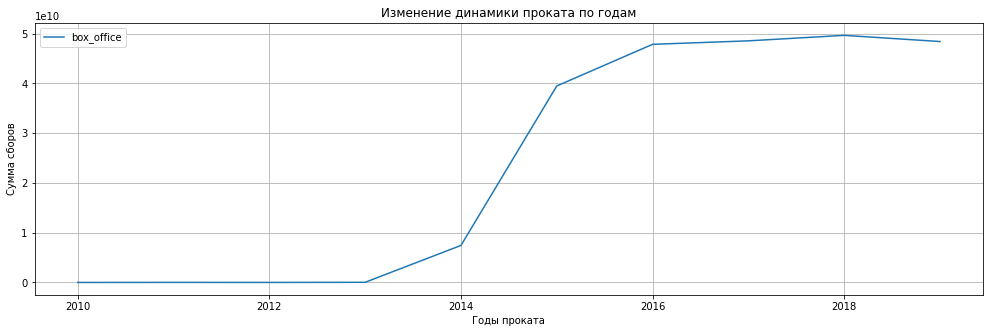

In [77]:
# вызовем query, чтобы исключить из таблицы box_office нулевые значения. Применим к полученному срезу pivot_table для 
# группировки интересующих нас значений и суммирования сборов по годам. К pivot_table применим функцию plot для построения 
# графика. Для большей наглядности укажем, что нам нужна сетка (grid) и предпочитаемый размер (figsize):
(
    mkrf_merge.query('box_office != 0')
    .pivot_table(index='year_distrib', values='box_office', aggfunc='sum')
    .plot(grid=True, figsize=(17, 5), title='Изменение динамики проката по годам')
)

# выводим полученное значение на экран и подписываем оси:
plt.ylabel ("Сумма сборов")
plt.xlabel("Годы проката")
plt.show()

По таблице видим, что очевидно в датафрейме нет данных по кассовым сборам за 2010-2013 года включительно. Это объяснимо, учитывая гистограмму выше, которая тоже показала, что данных с фильмами, чей прокат был в эти годы, у нас мало. Эти годы мы объективно оценивать не можем. Также, по-видимому, отсутствует и изрядная часть данных за 2014 год. Этот год тоже лучше из оценки исключить.

Из того что можно объективно проанализировать, видим, что в 2015 были самые низкие сборы.

2016-2019 годы включительно выделяются стабильностью по прокату. Максимальное значение сборов при этом видим в 2018 году - видимо, сказалось то, что из-за угрозы забастовки сценаристов часть фильмов вышли именно в этот год, а не раньше. Однако стоит отметить, что сумма сборов 2018 года все равно немногим больше соседних годов на графике. 

Интересно и то, что в 2016 и 2019 годах вышло максимальное количество фильмов, судя по гистограмме, а они собрали меньше денег, чем в 2017, когда наблюдалась весомая просадка, и в 2018, когда просадки уже не было, но фильмов на экранах было всё равно меньше.

#### 3.3 Посчитаем среднюю и медианную сумму сборов для каждого года

In [78]:
# Создаем новую сводную табличку, срезая нулевые значения box_office при помощи query. Чтобы посчитать среднюю и медианную 
# сумму сборов в aggfunc пропишем соответствующие функции, в также сбросим индекс для удобства отображения:
year_box_office = (
    mkrf_merge.query('box_office != 0')
    .pivot_table(index='year_distrib', values='box_office', aggfunc=['mean', 'median']).reset_index()
)

# Переведем данные в столбцах в целочисленный тип, чтобы не получить неудобочитаемые значения:
year_box_office[['mean', 'median']] = (
    year_box_office[['mean', 'median']].astype('int')
)

# Переименуем колонки:
year_box_office.columns = (
    ['Год проката в кино', 'Средние сборы', 'Медианные сборы']
)

# Выведем получившуюся табличку на экран, скрыв ненужный индекс строк:
display(year_box_office.style.hide_index())

Год проката в кино,Средние сборы,Медианные сборы
2010,24046,1710
2011,129383,3000
2012,56648,6110
2013,166478,3580
2014,27270885,20400
2015,85492132,5003449
2016,91347528,3957926
2017,136032793,9968340
2018,104785573,8911533
2019,91369261,4627798


Видим, что значения сборов не такие уж и нулевые за 2010-2013 года, но их действительно мало, особенно при взгляде на медиану. Это же можно сказать и про 2014 год. В среднем он собрал вроде нормальную сумму, однако по медиане видно, что "выстреливших" фильмов были единицы.

В других годах медиана тоже сильно отстает от среднего заработка, пусть и не настолько заметно как в 2014 г. Однако для кинобизнеса это нормально - далеко не все фильмы нравятся зрителю и окупают себя. Какие-то картины могут зарабатывать гроши, какие-то приносить огромные суммы. Это неизбежно будет создавать выбросы в данных, что и выливается в пропасть между средними и медианными сборами. Подобные показатели ясно дают понять нам, что для объективного анализа лучше и в дальнейшем использовать в расчетах медиану для значений, где однозначно возможны выбросы.

#### 3.4 Посмотрим, влияет ли возрастное ограничение аудитории на сборы фильма в прокате в период с 2015 по 2019 год

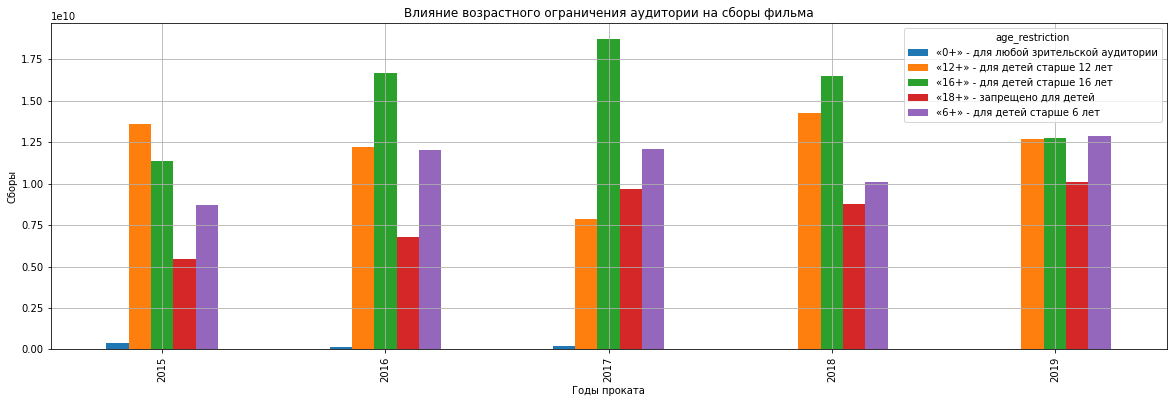

In [79]:
# Создадим столбчатый график. Для этого срежем нулевые значения box_office при помощи query и укажем, что нам нужны годы проката
# с 2015 по 2019. Вызовем функцию pivot_table, указав ей столбцы, на базе которых будет создаваться график. Просуммируем сборы 
# фильмов с разным возрастным ограничением при помощи sum. После чего применим к pivot_table функцию plot с параметрами для
# построения интересующего нас графика:

(
    mkrf_merge.query('box_office != 0 and year_distrib > 2014')
    .pivot_table(index='year_distrib', columns='age_restriction', values='box_office', aggfunc='sum')
    .plot(kind="bar", figsize=(20, 6), grid=True)
)

# выводим результат на экран и подписываем оси:
plt.title("Влияние возрастного ограничения аудитории на сборы фильма")
plt.ylabel ("Сборы")
plt.xlabel("Годы проката")
plt.show()

Видим, что в российском кинопрокате наиболее прибыльными являются фильмы с возрастной категорией 12+ и 16+. При этом 16+ лидирует по сборам практически везде за исключением 2015 года. Подобное можно объяснить тем, что фильмы этих категорий охватывают подавляющее большинство платежеспособной публики, которая ходит в кино.

Неплохую среднюю доходность показывает доля фильмов с возрастным ограничением 6+. На неё явно хорошо ходит своя аудитория - детская и семейная.

Поменьше доходность у категории 18+. Это кино слишком "на любителя" - сюда явно входят ужасы, эротика, боевики с натуралистичными сценами и прочее. Дети, семьи на такое не пойдут, да и не каждый взрослый тоже захочет. Но интересно то, что почти каждый год прибыльность у этого кино растет. То есть, оно имеет потенциал и в целом интересно зрителю.

Меньше всего зарабатывает категория 0+. Вероятно, это связано с тем, что картины этой категории часто бывают чрезмерно детскими - ограничения здесь настолько большие, что практически нельзя снять внятный сюжет, вызывающий интерес, у кого-то старше 5-6 лет, если мы говорим о художественных фильмах/мультфильмах. Аудитория у этих картин, соответственно, очень ограниченная - родители с маленькими детьми. Также, подобный рейтинг часто получает документальное кино, науч. поп и т.д. - это жанры, не ориентированные на широкий прокат, публику и, как следствие, не имеющие больших заработков.

Интересно, что во всех категориях был всплеск сборов в 2017 году. По-видимому, это случилось всё из-за той же угрозы забастовки сценаристов - в прокат вышло меньше картин, а значит у людей был меньше выбор в привычной для них категории фильмов. Они начинали идти на то кино, на которое обычно не ходили, что и привело к всплеску сборов во всех категориях.

По итогам этой части исследования выяснили, что:
- В датафрейме отсутствует много данных по прокату за 2010-2014 гг.;
- В среднем сборы по годам кажутся неплохими, однако медиана ясно показывает насколько по-разному могут зарабатывать фильмы;
- Лучше всего зарабатывают в прокате фильмы 12+ и 16+. Хуже всего кино с рейтингом 0+.

### Шаг 4. Исследуем фильмы, которые получили государственную поддержку

#### 4.1 Сколько всего выделило государство на фильмы в датафрейме?

Мы знаем, что господдержку получили те фильмы, у которых заполнены данные в столбце `budget`. Посмотрим, сколько всего было выделено на кинопроизводство:

In [81]:
# Вычислим сумму финансирования, сложив оба вида гос. поддержки:
print('Государство вложило в создание фильмов', (mkrf_merge['refundable_support'] + mkrf_merge['nonrefundable_support'])
      .sum(), 'руб.')

Государство вложило в создание фильмов 20200688312 руб.


Фильмам с гос. поддержкой, которые присутствуют в датафрейме, была выделена огромная сумма - более 20 млрд. рублей.

#### 4.2 Сколько собрали в прокате все фильмы с гос. поддержкой?

In [82]:
# Вычислим сумму сборов у всех фильмов, где budget !=0:
print('Сборы фильмов с гос. поддержкой составили:', mkrf_merge.query('budget != 0')['box_office'].sum(), 'руб.')

Сборы фильмов с гос. поддержкой составили: 42113509482 руб.


Видим, что фильмы с гос. поддержкой заработали больше 42 млрд. рублей. Это в 2 с небольшим раза больше по сравнению с вложениями государства. На первый взгляд кажется, что они себя окупили, но это ещё надо проверить, поскольку во многих фильмах гос. вложения - только часть бюджета.

#### 4.3 Вычислим заработок фильмов с гос. поддержкой:

In [83]:
# Вычтем из суммы сборов (заработка фильмов) их бюджет (расходы на создание), предварительно отфильтровав датафрейм, чтобы в нем
# были только значения с budget != 0:
print('Доходность фильмов с гос. поддержкой составила:', (mkrf_merge.query('budget != 0')['box_office']
                                                          .sum()) - (mkrf_merge.query('budget != 0')['budget']
                                                                     .sum()), 'руб.')

Доходность фильмов с гос. поддержкой составила: -1518725922 руб.


Видим, что несмотря на кажущиеся большие заработки, кино с гос. финансированием довольно убыточное - суммарные убытки всех фильмов составляют более 1,5 млрд. рублей.

Теперь пришло время выяснить какую долю занимает гос. бюджет от всего бюджета фильма и при какой доле стоит ждать меньшую окупаемость, а при какой - большую.

#### 4.4 Рассчитаем, какую часть денег обычно вкладывает государство в бюджет кино:

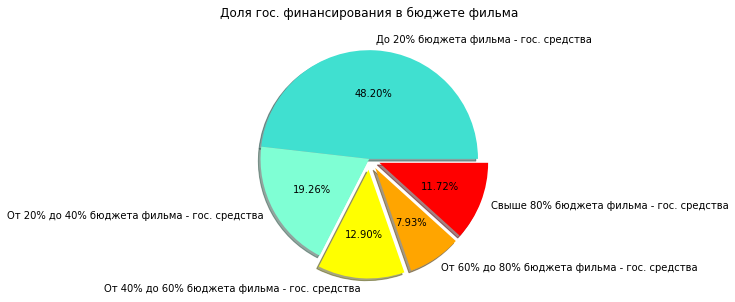

In [84]:
# Создадим функцию, которая, используя данные из таблички с процентным соотношением гос средств и общего бюджета, в зависимости
# от объёма гос. денег в бюджете, будет разделять все фильмы с гос. участием на 5 категорий: 
def budget_share(mkrf_merge):
    share = mkrf_merge['gov_budget_percent']
    
    if 0 < share <= 20:
        return 'До 20% бюджета фильма - гос. средства'
    
    elif 20 < share <= 40:
        return 'От 20% до 40% бюджета фильма - гос. средства'
    
    elif 40 < share <= 60:
        return 'От 40% до 60% бюджета фильма - гос. средства'
    
    elif 60 < share <= 80:
        return 'От 60% до 80% бюджета фильма - гос. средства'
    
    elif 80 < share <= 100:
        return 'Свыше 80% бюджета фильма - гос. средства'

# Применяем функцию к новому столбцу:
mkrf_merge['gov_budget_share'] = mkrf_merge.apply(budget_share, axis=1)

# Нарисуем круговую диаграмму, которая наглядно покажет нам сколько государство предпочитает вкладывать в бюджет кино. Для этого
# срезом ислючим из расчета фильмы без гос. поддержки, вызовем pivot_table и передадим этой функции столбцы, по которым хотим 
# видеть расчёт. Применим median, чтобы выбросы не влияли на цифры. Оформим круговую диаграмму соответствующими параметрами, 
# установив размер, вывод процентов и цвета отображения:
(
    mkrf_merge.query('budget != 0')
    .pivot_table(index='gov_budget_share', values='budget', aggfunc='median')
    .plot(kind='pie', y='budget', autopct='%.2f%%', explode=[0.0, 0.0, 0.1, 0.1, 0.1], shadow=True, figsize=(5, 5), label='', 
          legend=None, colors = ['turquoise', 'aquamarine', 'yellow', 'orange', 'red'])
)

# Подписываем и выводим результат на экран:
plt.title("Доля гос. финансирования в бюджете фильма")
plt.show()

Видим, что по большей части государство даёт фильму до 20% всего бюджета. В 2 с лишним раза реже фильм получает финансирование от 20 до 40%. Практически одинаковое количество тех фильмов, что получают от государства 40-60% и свыше 80% бюджета. Меньше всего фильмов, чей гос. бюджет составляет 60-80% от всего бюджета.

#### 4.5 Посчитаем прибыльность фильмов в зависимости от гос. участия:

In [85]:
# Для каждой категории доли участия гос-ва в бюджете фильма произведём расчеты через срезы интересующих значений, где из сборов
# вычтем бюджет:
print('Прибыльность фильмов, где гос. деньги занимали до 20% бюджета, составила:', mkrf_merge
      .query('budget != 0 and gov_budget_percent <= 20')['box_office']
      .sum() - mkrf_merge.query('budget != 0 and gov_budget_percent <= 20')['budget'].sum(), 'руб.')
print()
print('Прибыльность фильмов, где гос. деньги занимали от 20 до 40 % бюджета, составила:', mkrf_merge
      .query('budget != 0 and 20 < gov_budget_percent <= 40')['box_office']
      .sum() - (mkrf_merge.query('budget != 0 and 20 < gov_budget_percent <= 40')['budget'].sum()), 'руб.')
print()
print('Прибыльность фильмов, где гос. деньги занимали от 40 до 60 % бюджета, составила:', mkrf_merge
      .query('budget != 0 and 40 < gov_budget_percent <= 60')['box_office']
      .sum() - (mkrf_merge.query('budget != 0 and 40 < gov_budget_percent <= 60')['budget'].sum()), 'руб.')
print()
print('Прибыльность фильмов, где гос. деньги занимали от 60 до 80 % бюджета, составила:', mkrf_merge
      .query('budget != 0 and 60 < gov_budget_percent <= 80')['box_office']
      .sum() - (mkrf_merge.query('budget != 0 and 60 < gov_budget_percent <= 80')['budget'].sum()), 'руб.')
print()
print('Прибыльность фильмов, где гос. деньги занимали свыше 80% бюджета, составила:', mkrf_merge
      .query('budget != 0 and 80 < gov_budget_percent <= 100')['box_office']
      .sum() - (mkrf_merge.query('budget != 0 and 80 < gov_budget_percent <= 100')['budget'].sum()), 'руб.')

Прибыльность фильмов, где гос. деньги занимали до 20% бюджета, составила: -4863712550 руб.

Прибыльность фильмов, где гос. деньги занимали от 20 до 40 % бюджета, составила: 4079344167 руб.

Прибыльность фильмов, где гос. деньги занимали от 40 до 60 % бюджета, составила: 928820068 руб.

Прибыльность фильмов, где гос. деньги занимали от 60 до 80 % бюджета, составила: -3044542142 руб.

Прибыльность фильмов, где гос. деньги занимали свыше 80% бюджета, составила: 1381364535 руб.


Видим, что убыточны те фильмы, в которые государство вложило до 20% или от 60 до 80% бюджета.
Окупили себя те фильмы, где участие государства составило от 40 до 60% бюджета, а также те, где гос. финансирование составило свыше 80%. Больше всего заработало то кино, где участие государства было не эпизодическим, но и не чрезмерным - когда вложения гос-ва составили от 20 до 40%.

#### 4.6 Сколько в среднем государство дает на фильм?

In [86]:
# Создадим новый столбец total_gov_budget, куда войдут суммарные затраты государства на кино:
mkrf_merge['total_gov_budget'] = (mkrf_merge['refundable_support'] + mkrf_merge['nonrefundable_support'])
# Исключив фильмы без гос. финансирования при помощи среза, применим describe, чтобы увидеть как распределяются значения в этом 
# столбце: 
mkrf_merge.query('budget > 0')['total_gov_budget'].describe().astype('int')

count          332
mean      60845446
std       72755459
min        3000000
25%       25333750
50%       35000000
75%       60000000
max      500000000
Name: total_gov_budget, dtype: int64

Видим, что стандартное отклонение ну очень велико - это характерно для данных с большим разбросом значений. Значит среднее здесь непоказательно. Значительно лучше отражает картину медиана. По ней видим, что большинство фильмов получает от государства 35 млн. Но есть и те, кто получает деньги в районе 25,3 млн (первый процентиль), так и 60 млн (третий процентиль). Максимальное значение полученное от гос-ва - 500 млн., а минимальное - 3 млн.

#### 4.7 Сколько в российском прокате зарабатывают отечественные фильмы с гос. поддержкой и без гос. поддержки??

Сравним доходность кинопроката, вызвав функцию describe для картин с НЕнулевым `box_office` и разными условиями по бюджету:

**Заработок в прокате российских фильмов с гос. вложениями:**

In [87]:
# Отрезаем срезом неинтересные нам значения:
mkrf_merge_budget = mkrf_merge.query('budget != 0 and box_office > 0 and production_country == "Россия"')
# Вызываем describe, чтобы получить представление о распределении данных в таблице:
mkrf_merge_budget['box_office'].describe().astype('int')

count           304
mean      134623539
std       341009125
min            1550
25%         1227869
50%        16390500
75%       106934534
max      3073568690
Name: box_office, dtype: int64

**Заработок в прокате российских фильмов БЕЗ гос. вложений:**

In [88]:
# Отрезаем срезом неинтересные нам значения:
mkrf_non_budget = mkrf_merge.query('budget == 0 and box_office > 0 and production_country == "Россия"')
# Вызываем describe, чтобы получить представление о распределении данных в таблице:
mkrf_non_budget['box_office'].describe().astype('int')

count           463
mean       21791692
std       108857704
min             100
25%            6032
50%          107979
75%         3011630
max      1682680039
Name: box_office, dtype: int64

При анализе обоих условий на среднее ориентироваться не будем, поскольку стандартное отклонение и там, и там слишком велико и среднее непоказательно.

Минимум, который заработали картины **с гос. поддержкой** - 1550 руб. Максимум - более 3 млрд. Картины, что зарабатывают поменьше (1-ый процентиль) - имеют с проката сумму в районе 1,22 млн. Медианное значение сборов (у большинства фильмов) - 16,39 млн. Но есть и фавориты проката (3-ий процентиль), которые собирают суммы около 106,93 млн.

В то же время отечественные картины **без гос. поддержки** зарабатывают меньше. Минимальная сумма сборов - 100 рублей. Максимальная - 1,68 млрд. - прилично, но явно почти в 2 раза меньше уровня сборов отдельных картин с гос. поддержкой. 25% картин, собирающих поменьше в прокате, имеет сумму в районе 6 тыс. рублей. Большинство фильмов (50%) зарабатывают 107.9 тыс. И только 25% кино доходит до суммы сборов в районе 3,011 млн. 

Видим, что в российском кинопрокате по всем параметрам лучше доходность у кино, в которое вложилось государство - при меньшем количестве картин оно дает явно более высокую прибыль.

#### 4.8 В фильмы каких жанров любит вкладываться государство и на каких условиях?

Для начала посмотрим представленность отдельных жанров в датафрейме. Фильмов некоторых явно редких жанров может быть всего 1-2 с редкими значениями по оценкам и доходности, а они смажут нам картину на графике, как что-то из ряда вон по доходности или рейтингу. Такие фильмы целесообразнее будет объединить в отдельную категорию `Остальное`.

In [89]:
# Вызовем функцию value_counts к столбцу *main_genre*, которая подсчитает представленность каждого жанра в датафрейме:
mkrf_merge['main_genre'].value_counts()

драма              1687
Неизвестно          957
комедия             696
боевик              617
ужасы               573
мультфильм          537
триллер             521
фантастика          409
мелодрама           383
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              27
история              26
короткометражка      12
концерт              10
спорт                 9
вестерн               7
музыка                7
для взрослых          3
фильм-нуар            1
реальное ТВ           1
Name: main_genre, dtype: int64

Из явно редких и нетипичных, что в датафрейме, что по снимаемости *фильм-нуар*, *реальное ТВ* и *для взрослых*. Объединим их в "*Остальное*":

In [90]:
# Вызовем метод replace, где пропишем какие жанры надо заменить. В параметрах укажем inplace=True, чтобы замена в датафрейме 
# состоялась:
mkrf_merge['main_genre'].replace(
                         ['для взрослых', 'фильм-нуар', 'реальное ТВ'], 
                         'Остальное',
                         inplace=True)

# Убедимся, что теперь в датафрейме представлены те значения, что мы ожидаем увидеть:
mkrf_merge['main_genre'].value_counts()

драма              1687
Неизвестно          957
комедия             696
боевик              617
ужасы               573
мультфильм          537
триллер             521
фантастика          409
мелодрама           383
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              27
история              26
короткометражка      12
концерт              10
спорт                 9
вестерн               7
музыка                7
Остальное             5
Name: main_genre, dtype: int64

После укрупнения редких жанров до одной группы можно оценить инвестиции государства в каждый жанр при помощи столбчатого графика.

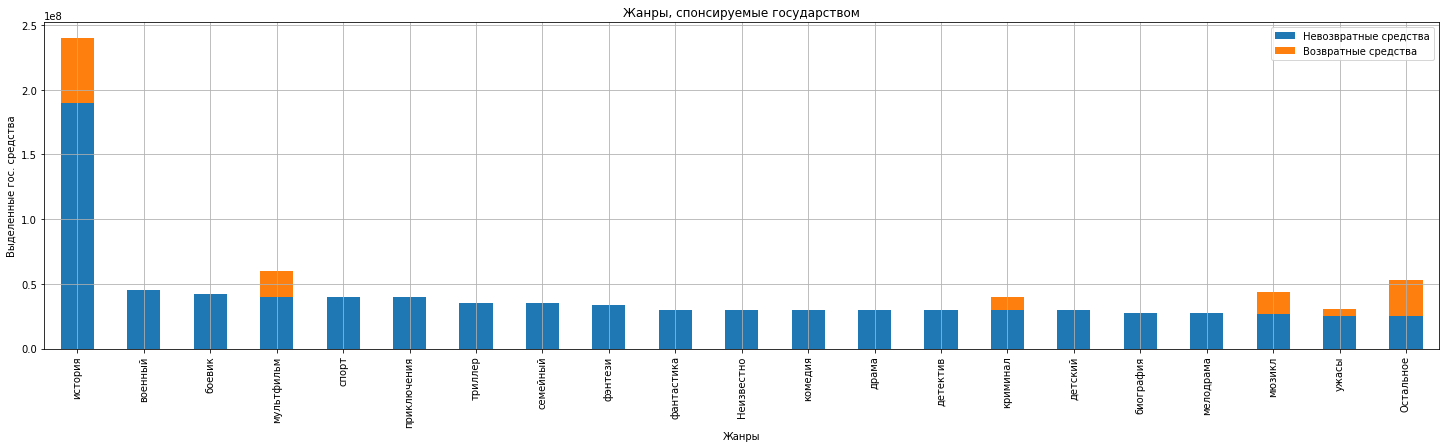

In [91]:
# Создадим столбчатый график. Для этого срежем нулевые значения budget при помощи query. Вызовем функцию pivot_table, указав
# ей столбцы, на базе которых будет создаваться график. Для расчета медианных значений сборов в aggfunc пропишем соответствующую
# функцию. После чего применим к pivot_table функцию plot с параметрами для построения интересующего нас графика:
(
    mkrf_merge.query('budget != 0')
    .pivot_table(index='main_genre', values=['refundable_support', 'nonrefundable_support'], aggfunc='median')
    .sort_values(by=['nonrefundable_support'], ascending=False)
    .plot(kind="bar", stacked=True, figsize=(25, 6), grid=True)
)

# выводим результат на экран и подписываем оси:
plt.legend(["Невозвратные средства", "Возвратные средства"])
plt.title("Жанры, спонсируемые государством")
plt.ylabel ("Выделенные гос. средства")
plt.xlabel("Жанры")
plt.show()

Видим, что особенно любит государство жанр истории и готово в него вкладывать баснословные деньги, причем по большей части на невозвратной основе. 

Ни один другой жанр так государством и близко не обласкан. Тем не менее, можем выделить, что ещё государство предпочитает вкладываться в такие жанры как *Мультфильм*, *Мюзикл*, *Военный* и *Остальное*. Но здесь оно предпочитает всё-таки давать возвращаемые деньги, кроме жанра *Военный*.

#### 4.8 В фильмы каких жанров любит вкладываться государство и на каких условиях?

Сравним, насколько велика доходность отдельных жанров по сравнению с гос. вложениями.

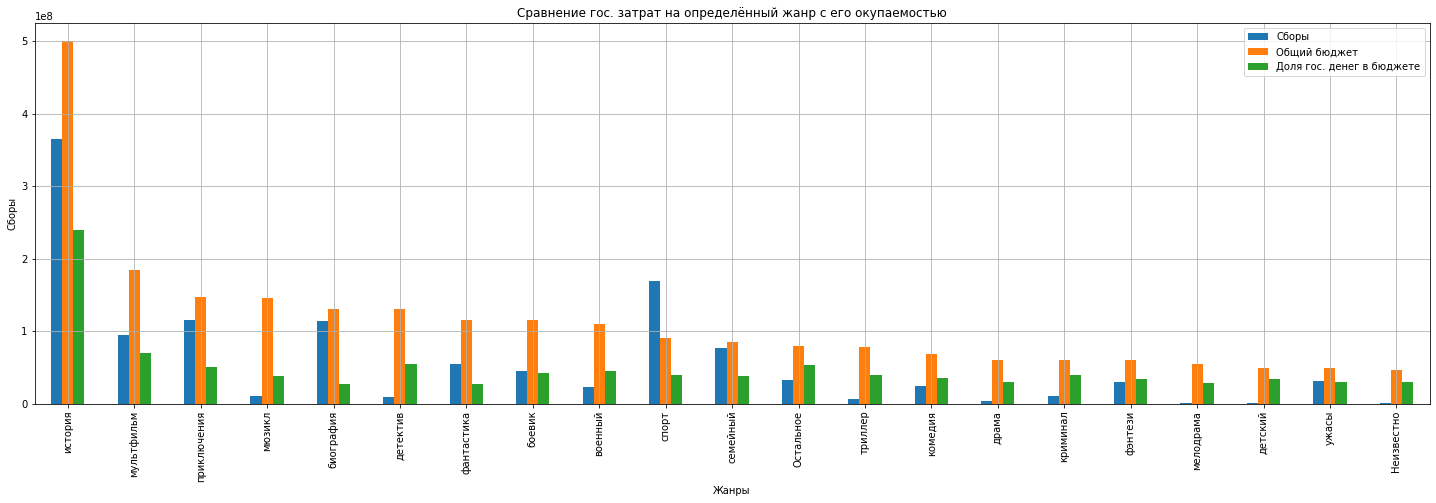

In [92]:
# Создадим столбчатый график. Для этого срежем нулевые значения budget и box_office при помощи query. Вызовем функцию 
# pivot_table, указавей столбцы, на базе которых будет создаваться график. Для расчета медианных значений сборов/бюджета в 
# aggfunc пропишем соответствующую функцию. Применим к pivot_table функцию plot с параметрами для построения интересующего нас 
# графика:
(
    mkrf_merge.query('budget != 0 and box_office > 0')
    .pivot_table(index='main_genre', 
                 values=['budget', 'box_office', 'total_gov_budget'], aggfunc='median')
    .sort_values(by=['budget'], ascending=False)
    .plot(kind="bar", figsize=(25, 7), grid=True)
)
# выводим результат на экран и подписываем оси:
plt.legend(["Сборы", "Общий бюджет", "Доля гос. денег в бюджете"])
plt.title("Сравнение гос. затрат на определённый жанр с его окупаемостью")
plt.ylabel ("Сборы")
plt.xlabel("Жанры")
plt.show()

Видим, что исторический жанр явно не оправдывает вложенные в себя деньги - при огромных затратах на съемки подобного рода фильмов, получается убыток, причем значительный.

Впрочем таким грешит не только *история* - по графику видно, что практически всё кино с гос. бюджетом, кроме жанра *спорт*, скорее убыточно. Наиболее убыточны наряду с *историей*, жанры *мюзикл* и *детектив*.

При этом близки к самоокупаемости и в отдельных случаях окупаемы, кроме *спорта*, ещё и такие жанры, как *приключения*, *биография*, *семейный*.

#### 4.10 Каким режиссерам чаще всего выделяет деньги государство и на каких условиях?

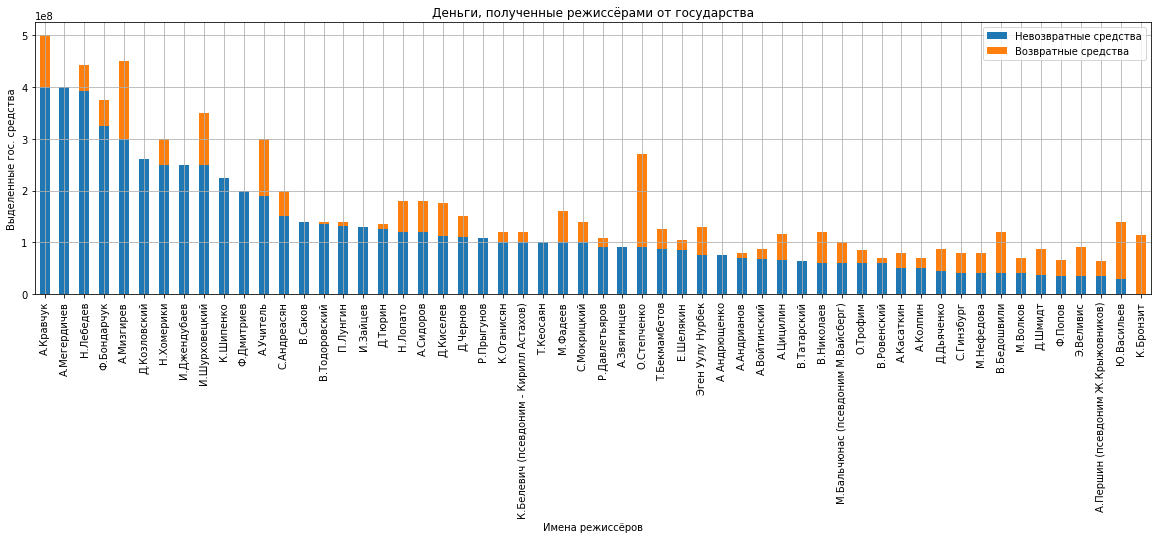

In [93]:
# Создадим столбчатый график. Для этого срежем нулевые значения budget при помощи query, а также пропишем в условиях, что 
# нас интересуют те режиссеры, чьи фильмы получили сумму более 3-го процентиля всех выделяемых государством денег - это 60 млн. 
# Вызовем функцию pivot_table, указав ей столбцы, на базе которых будет создаваться график. После чего применим к pivot_table 
# функцию plot с параметрами для построения интересующего нас графика:
(
    mkrf_merge.query('budget != 0 and total_gov_budget > 60000000')
    .pivot_table(index='main_director', values=['refundable_support', 'nonrefundable_support'])
    .sort_values(by=['nonrefundable_support'], ascending=False)
    .plot(kind="bar", stacked=True, figsize=(20, 5), grid=True)
)

# выводим результат на экран и подписываем оси:
plt.legend(["Невозвратные средства", "Возвратные средства"])
plt.title("Деньги, полученные режиссёрами от государства")
plt.ylabel ("Выделенные гос. средства")
plt.xlabel("Имена режиссёров")
plt.show()

Оказывается, режиссеров, получивших на свои фильмы 60 млн. и выше, довольно много. Причем чем больше сумма, которую дает государство, тем меньше оно требует её возврата. Исключение составляет тут только режиссер О. Степченко - ему государство все же предпочитает давать много денег, но больше на возвратных условиях.

#### 4.11 Какова прибыльность от каждого режиссера из максимально спонсируемых и окупаемость вложений в него?

Для дальнейшего анализа укрупним группу режиссеров до самых-самых спонсируемых государством и сравним окупают ли они вложения в свой талант.

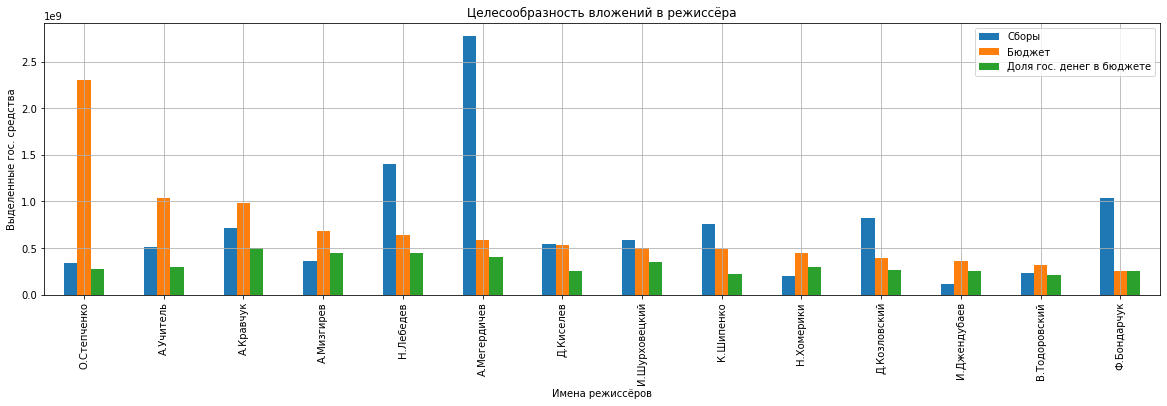

In [94]:
# Создадим столбчатый график. Для этого срежем нулевые значения box_office при помощи query, а также пропишем в условиях, что 
# нас интересуют те режиссеры, чьи фильмы получили сумму более 200 млн. Вызовем функцию pivot_table, указав ей столбцы, на базе 
# которых будет создаваться график. Для расчета медианных значений сборов/бюджета в aggfunc пропишем соответствующую функцию.
# После чего применим к pivot_table функцию plot с параметрами для построения интересующего нас графика:
(
    mkrf_merge.query('budget != 0 and box_office != 0 and total_gov_budget > 200000000')
    .pivot_table(index='main_director', 
                 values=['budget', 'box_office', 'total_gov_budget'])
    .sort_values(by=['budget'], ascending=False)
    .plot(kind="bar", figsize=(20, 5), grid=True)
)
# выводим результат на экран и подписываем оси:
plt.legend(["Сборы", "Бюджет", "Доля гос. денег в бюджете"])
plt.title("Целесообразность вложений в режиссёра")
plt.ylabel ("Выделенные гос. средства")
plt.xlabel("Имена режиссёров")
plt.show()

Видим, что Степченко получает денег много, но зарабатывают его фильмы мало. Режиссеры Учитель, Кравчук, Мизгирев тоже в плане доходности не восторг. Зато хорошие результаты в прокате показывают Лебедев, Бондарчук, Шипенко и Козловский. Король проката - Мегердичев. Именно на эти имена стоит ставить государству, если будет цель создать кассовые фильмы.

В датафрейме также есть данные по режиссерам, которым государство денег не давало. Интересно, кто из них больше всего зарабатывает в прокате?

#### 4.12 Какие российские режиссеры без гос. поддержки зарабатывают больше всего в российском прокате?

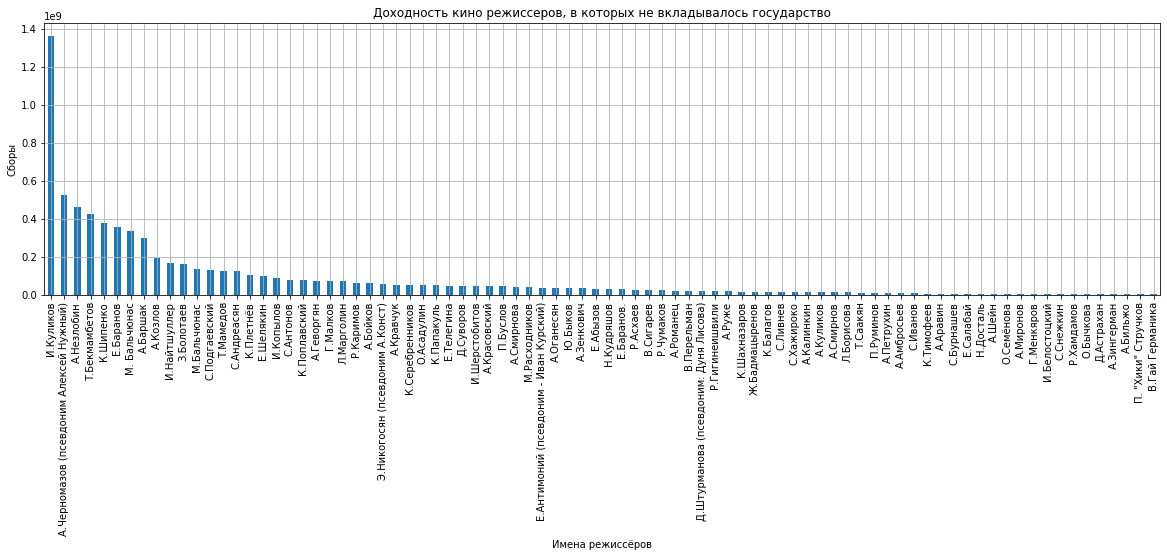

In [96]:
# Создадим столбчатый график. Для этого срежем нулевые значения box_office при помощи query, а также пропишем в условиях, что 
# нас интересуют режиссеры, чьи фильмы российские и получили сборы в размере не менее 3-го процентиля. Вызовем функцию 
# pivot_table, указав ей столбцы, на базе которых будет создаваться график. Для расчета медианных значений сборов/бюджета в 
# aggfunc пропишем соответствующую функцию. После чего применим к pivot_table функцию plot с параметрами для построения 
# интересующего нас графика:
(
    mkrf_merge.query('budget == 0 and box_office > 3011630 and production_country == "Россия"')
    .pivot_table(index='main_director', 
                 values='box_office')
    .sort_values(by=['box_office'], ascending=False)
    .plot(kind="bar", figsize=(20, 5), grid=True, legend=None)
)
# выводим результат на экран и подписываем оси:
plt.title("Доходность кино режиссеров, в которых не вкладывалось государство")
plt.ylabel ("Сборы")
plt.xlabel("Имена режиссёров")
plt.show()

Видим, что и без гос. поддержки прекрасно зарабатывают фильмы Куликова. Государству стоит обратить на него внимание, если есть цель создавать зарабатывающе в прокате кино.
Далее в первой пятерке с большим отрывом от Куликова по сборам, но, тем не менее в качестве потенциально доходных, можно выделить Черномазова, Незлобина, Бекмамбетова и Шипенко.

#### 4.13 Какой рейтинг получают фильмы, спонсированные государством?

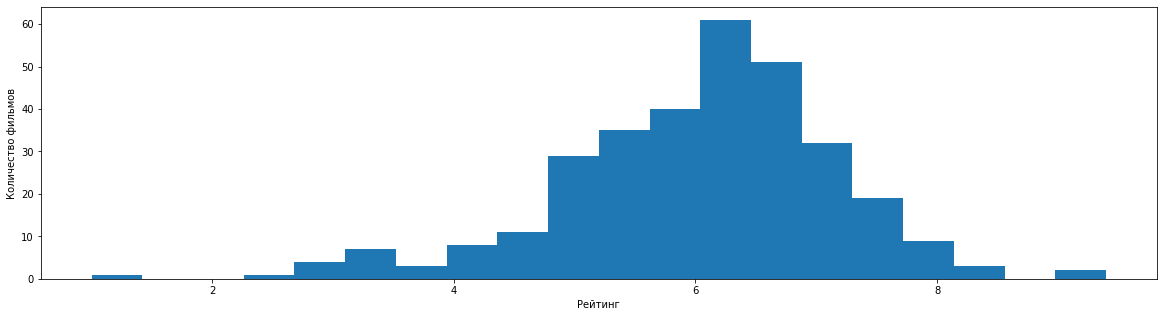

In [97]:
# Срезами "вырежем" интересные нам значения из таблицы и посмотрим распределение оценок при помощи гистограммы:
(
    mkrf_merge
    .query('budget != 0 and ratings != 0')
    ['ratings'].plot(kind='hist', bins=20, figsize=(20, 5))
)
# выводим гистограмму на экран и подписываем оси:
plt.ylabel ("Количество фильмов")
plt.xlabel("Рейтинг")
plt.show()

Видим, что большинство фильмов с гос. финансированием получают оценки от зрителей от 5 до 7.

##### Фильмы с каким рейтингом получают больше всего финансирования от государства?

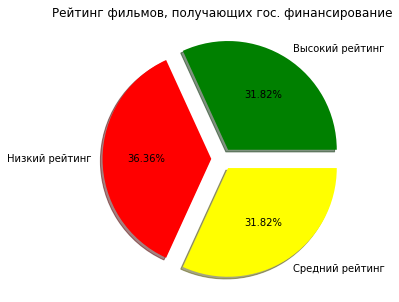

In [98]:
# Создадим функцию, которая, используя данные столбца со значениями рейтинга, разделит все фильмы с гос. участием на следующие
#категории:

def rating_type(mkrf_merge):
    rating = mkrf_merge['ratings']
    
    if 0 < rating < 3.5:
        return 'Низкий рейтинг'
    
    elif 3.5 <= rating < 6.5:
        return 'Средний рейтинг'
    
    elif 6.5 <= rating <= 10:
        return 'Высокий рейтинг'

# Применяем функцию к новому столбцу:
mkrf_merge['rating_type'] = mkrf_merge.apply(rating_type, axis=1)

# Нарисуем круговую диаграмму, которая наглядно покажет нам какой рейтинг у фильмов, получающих больше всего финансирования. 
# Для этого срезом исключим из расчета фильмы без гос. поддержки и с нулевым рейтингом, вызовем pivot_table и передадим этой 
# функции столбцы, по которым хотим видеть расчёт. Оформим круговую диаграмму соответствующими параметрами:
(
    mkrf_merge.query('budget != 0 and ratings != 0')
    .pivot_table(index='rating_type', values='total_gov_budget', aggfunc='median')
    .plot(kind='pie', y='total_gov_budget', autopct='%.2f%%', explode=[0.1, 0.1, 0.1], 
          shadow=True, figsize=(5, 5), label='', legend=None, colors = ['green', 'red', 'yellow'])
)
# Подписываем и выводим результат на экран:
plt.title("Рейтинг фильмов, получающих гос. финансирование")
plt.show()

Наибольшая часть гос. финансирования достается фильмам с низким рейтингом - 36,36%. Но, справедливости ради, стоит отметить, что и на фильмы со средним и высоким рейтингом государство тоже выделяет нормальные деньги - по 31,82%. В совокупности их доля значительно превышает долю низкорейтингового кино.

#### 4.14 Фильмы с каким рейтингом получают больше всего денег в прокате? (бюджет с государственным участием)

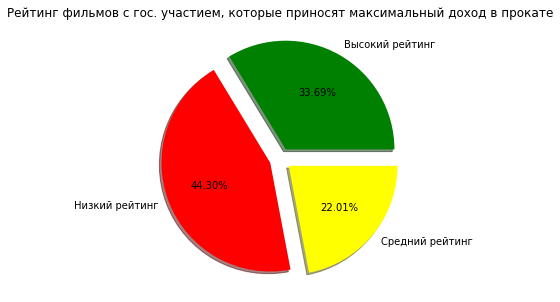

In [99]:
# Cрезом исключим из расчета фильмы без гос. поддержки и с нулевым рейтингом, вызовем pivot_table и передадим этой функции 
# столбцы, по которым хотим видеть расчёт. Оформим круговую диаграмму соответствующими параметрами:
(
    mkrf_merge.query('budget != 0 and ratings > 0 and box_office !=0')
    .pivot_table(index='rating_type', values='box_office', aggfunc='median')
    .plot(kind='pie', y='box_office', autopct='%.2f%%', explode=[0.1, 0.1, 0.1], shadow=True,
          figsize=(5, 5), label='', legend=None, colors = ['green', 'red', 'yellow'])
)
# Подписываем и выводим результат на экран:
plt.title("Рейтинг фильмов с гос. участием, которые приносят максимальный доход в прокате")
plt.show()

Получается, что наибольшую прибыль приносит таки низкорейтинговое кино. Вероятно, сказывается то, что в таких фильмах, как правило, незамысловатый сюжет, понятный широкому зрителю, простые шутки и действия героев, что позволяет максимально охватить среднюю аудиторию.
Тем не менее, радует, что то кино, которое зрители оценили как "качественное" (высокий рейтинг) или хотя бы как "скорее качественное" (средний рейтинг) в совокупности всё-таки получают немного больше в прокате, чем фильмы с низким рейтингом.

А как обстоит дело с рейтингом, если отечественное кино спонсирует не государство?

#### 4.15 Какой рейтинг получают фильмы БЕЗ гос. вложений?

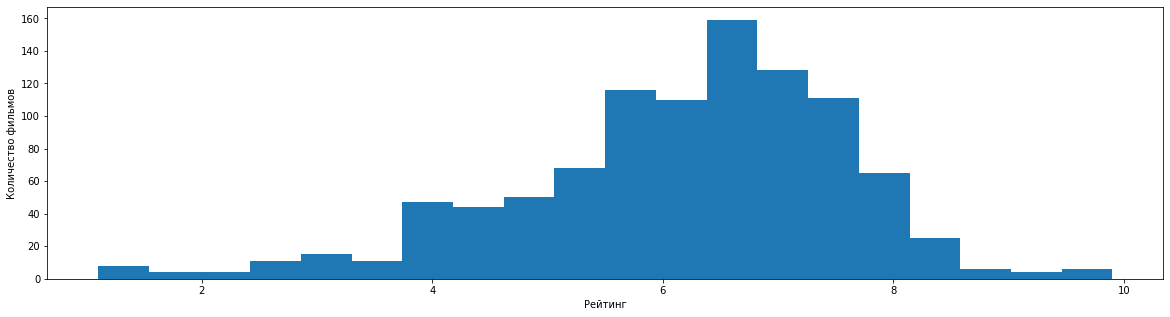

In [100]:
# Срезами "вырежем" интересные нам значения из таблицы и посмотрим распределение оценок при помощи гистограммы:
(
    mkrf_merge
    .query('budget == 0 and ratings != 0 and production_country == "Россия"')
    ['ratings'].plot(kind='hist', bins=20, figsize=(20, 5))
)
# выводим гистограмму на экран и подписываем оси:
plt.ylabel ("Количество фильмов")
plt.xlabel("Рейтинг")
plt.show()

Видим, что рейтинги у фильмов без гос. поддержки более высокие - чаще всего оно получает оценки примерно от 5,5 до 8 против 5-7 у фильмов с гос. поддержкой. То есть, с точки зрения искусства такое кино в среднем более качественное.

#### 4.16 Фильмы с каким рейтингом собирают больше всего денег в прокате? (российское кино без гос. участия)

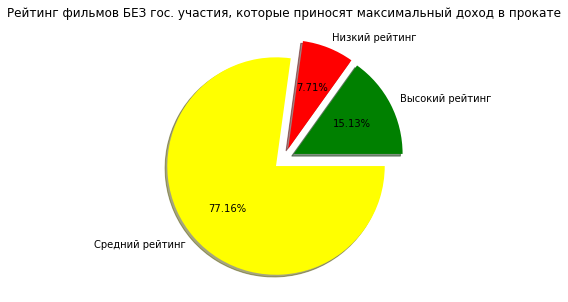

In [101]:
# Cрезом исключим из расчета фильмы без гос. поддержки и с нулевым рейтингом, вызовем pivot_table и передадим этой функции 
# столбцы, по которым хотим видеть расчёт. Оформим круговую диаграмму соответствующими параметрами:
(
    mkrf_merge.query('budget == 0 and ratings > 0 and box_office !=0 and production_country == "Россия"')
    .pivot_table(index='rating_type', values='box_office', aggfunc='median')
    .plot(kind='pie', y='box_office', autopct='%.2f%%', explode=[0.1, 0.1, 0.1], shadow=True,
          figsize=(5, 5), label='', legend=None, colors = ['green', 'red', 'yellow'])
)
# Подписываем и выводим результат на экран:
plt.title("Рейтинг фильмов БЕЗ гос. участия, которые приносят максимальный доход в прокате")
plt.show()

Получается, отсутствие гос. денег в бюджете скорее позитивно сказывается на рейтингах. Люди оценивают такое кино более положительно. Это может быть связано с тем, что в отсутствие "легких" денег от государства, киноделы больше стараются выпустить качественный, конкурентный продукт.

Также, если фильмы с гос. участием могут при более низких рейтингах собрать больше просто потому, что государство часто массированно рекламирует продукт со своим участием и на него приходит много людей, а значит и денег, то фильмы БЕЗ гос. участия такого себе позволить не могут. У них попросту нет такого рекламного ресурса и люди часто ходят смотреть подобное кино, если там есть на что смотреть, что, опять же, вынуждает улучшать качество фильма.

#### 4.17 Какой рейтинг у фильмов режиссеров, получающих больше всего денег от государства?

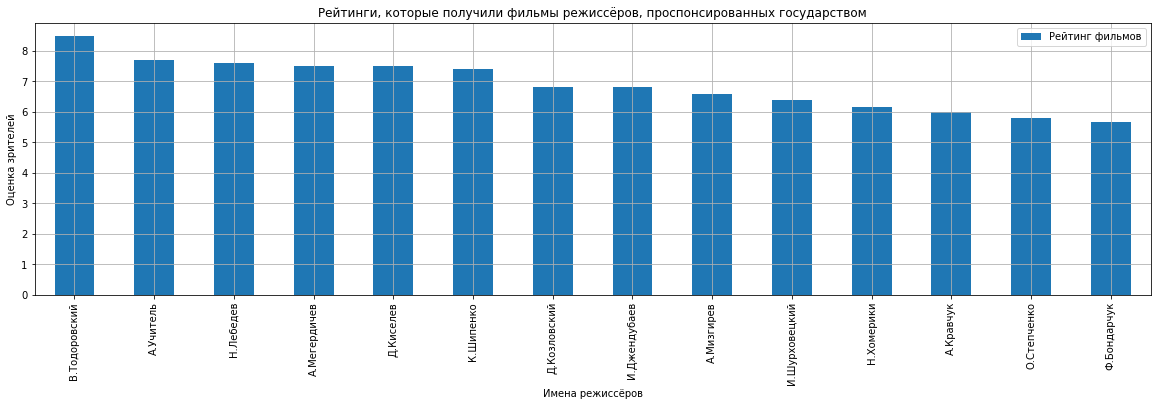

In [102]:
# Срезом отсеиваем значения так, чтобы остались только те фильмы, которые проспонсировало государство и чтобы гос. часть бюджета
# при этом была не менее 200 млн. Нулевые значения рейтинга также отсеиваем - мы сами проставили эти нули. Вызовем pivot_table и
# plot для построения графика, на котором будет наглядно видно как распределяются оценки пользователей по режисссерам:
(
    mkrf_merge.query('budget != 0 and ratings > 0 and total_gov_budget > 200000000')
    .pivot_table(index='main_director', values='ratings')
    .sort_values(by=['ratings'], ascending=False)
    .plot(kind="bar", figsize=(20, 5), grid=True)
)

# выводим результат на экран и подписываем оси:
plt.legend(["Рейтинг фильмов"])
plt.title("Рейтинги, которые получили фильмы режиссёров, проспонсированных государством")
plt.ylabel ("Оценка зрителей")
plt.xlabel("Имена режиссёров")
plt.show()

"Интересное кино" - видим, что наиболее рейтинговые Тодоровский и Учитель, которые в прокате показывают убыточный результат. То есть, зрители оценивают их творчество, как хорошее кино, но денег это много не приносит.
Из финансово выгодных режиссеров видим в первой 5-ке только Мегердичева и Лебедева - их фильмам государство дало немало денег, но они, судя по имеющимся данным, смогли и покрыть расходы на фильм, и заработать, и получить неплохие оценки у зрителей.

Аутсайдеры рейтингов - Кравчук, Степченко и Бондарчук. И если творчество Бондарчука хотя бы окупает себя в прокате, то Кравчук и, тем более, Степченко этим похвастаться не могут.

#### 4.18 Какой рейтинг у режиссеров, снимавших кино БЕЗ гос. финансирования?

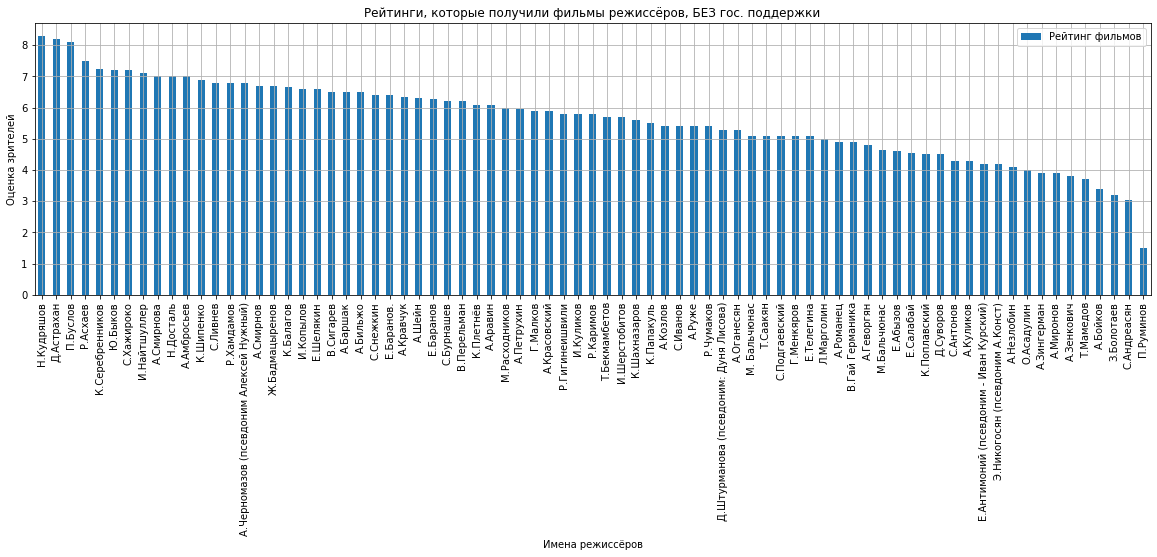

In [103]:
# Срезом отсеиваем значения так, чтобы остались только те фильмы, которые отечественные и которые не спонсировало государство, 
# также укрупним данные, чтобы показывалась информация по режиссерам, собравшим не менее 3-го процентиля. Нулевые значения 
# рейтинга отсеиваем - мы сами проставили эти нули. Вызовем pivot_table и plot для построения графика, на котором будет наглядно 
# видно как распределяются оценки пользователей по режисссерам:
(
    mkrf_merge.query('budget == 0 and ratings > 0 and box_office > 3011630 and production_country == "Россия"')
                     .pivot_table(index='main_director', values='ratings')
    .sort_values(by=['ratings'], ascending=False)
    .plot(kind="bar", figsize=(20, 5), grid=True)
)

# выводим результат на экран и подписываем оси:
plt.legend(["Рейтинг фильмов"])
plt.title("Рейтинги, которые получили фильмы режиссёров, БЕЗ гос. поддержки")
plt.ylabel ("Оценка зрителей")
plt.xlabel("Имена режиссёров")
plt.show()

С точки зрения оценки от зрителей опять видим ситуацию, когда режиссеры снимают качественное кино, но в прокате оно чувствует себя не особо. Тем не менее, если у государства будет цель снимать именно фильмы с высокой культурной ценностью, можно обратить внимание на первую пятерку-десятку режиссеров этого рейтинга. В особенности заметна первая тройка, получившая оценку свыше 8 - это режиссеры Кудряшов, Астрахан и Буслов.

#### 4.19 Какие жанры из гос. финансируемых и вышедших в прокат самые рейтинговые?

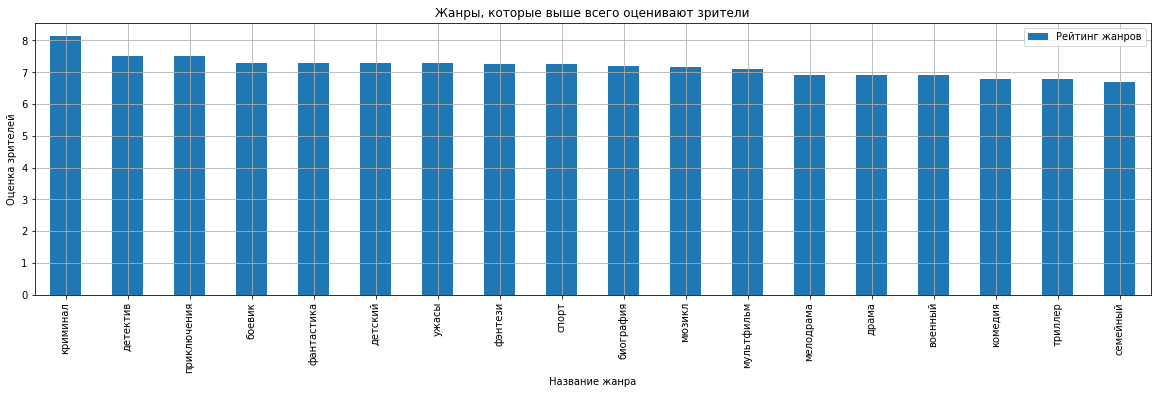

In [104]:
# Срезом отсеиваем значения так, чтобы остались только те фильмы, которые проспонсировало государство и которые участвовали в
# прокате. Значения рейтинга установим больше 6,5 - фильмы с высоким рейтингом. Вызовем pivot_table и plot для построения
# графика, на котором будет наглядно видно как распределяются оценки пользователей в связи с рейтингом фильмов:
(
    mkrf_merge.query('budget != 0 and ratings > 6.5 and box_office !=0')
    .pivot_table(index='main_genre', values='ratings', aggfunc='median')
    .sort_values(by=['ratings'], ascending=False)
    .plot(kind="bar", figsize=(20, 5), grid=True)
)

# выводим результат на экран и подписываем оси:
plt.legend(["Рейтинг жанров"])
plt.title("Жанры, которые выше всего оценивают зрители")
plt.ylabel ("Оценка зрителей")
plt.xlabel("Название жанра")
plt.show()

Видим, что зрителям отечественного проката весьма нравятся *криминал*, *детектив* и *приключения* - именно фильмы с таким жанром чаще всего получают оценки около 7,5 и выше. 

Из жанров, которые особенно активно спонсирует государство, мы можем здесь видеть *Мультфильм*, *Мюзикл* и *Военный*.

#### 4.20 Фильмы с каким жанром чаще всего получают низкую оценку в прокате?

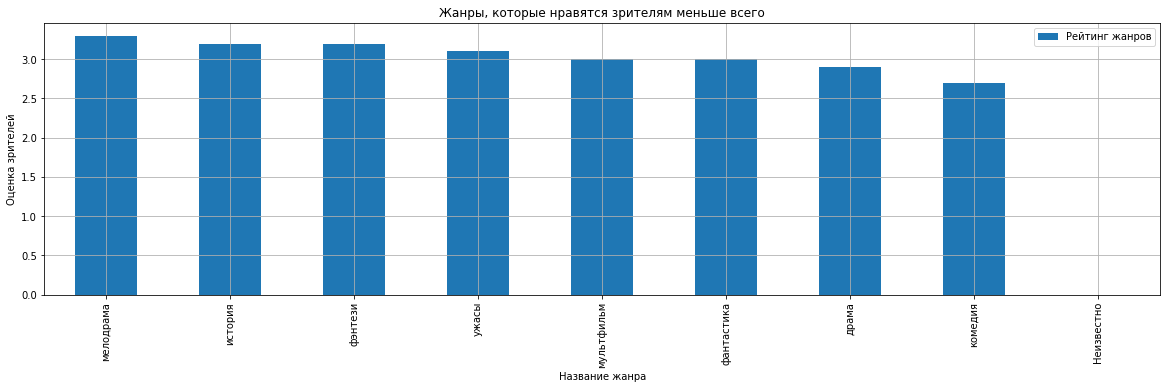

In [105]:
# Срезом отсеиваем значения так, чтобы остались только те фильмы, которые проспонсировало государство и которые участвовали в
# прокате. Значения рейтинга установим меньше 3,5 - фильмы с низким рейтингом. Вызовем pivot_table и plot для построения
# графика, на котором будет наглядно видно как распределяются оценки пользователей в связи с рейтингом фильмов:
(
    mkrf_merge.query('budget != 0 and ratings < 3.5 and box_office !=0')
    .pivot_table(index='main_genre', values='ratings', aggfunc='median')
    .sort_values(by=['ratings'], ascending=False)
    .plot(kind="bar", figsize=(20, 5), grid=True)
)
# выводим результат на экран и подписываем оси:
plt.legend(["Рейтинг жанров"])
plt.title("Жанры, которые нравятся зрителям меньше всего")
plt.ylabel ("Оценка зрителей")
plt.xlabel("Название жанра")
plt.show()

Некоторые значения тут повторяют предыдущий график. Например, здесь тоже можно увидеть жанр *Комедия* или *Мультфильм*. Это нормально, так как разные фильмы получают разные оценки, поэтому может сложится ситуация, когда много кинопродукции одного жанра получило как низкие, так и высокие оценки.

Но на этом графике мы также можем видеть и новые значения. Наиболее заметно то, что та же *История* часто получает оценки чуть выше 3. И это при огромных вложениях в неё. Также в "лучших из худших" видим *Фэнтези* и *Мелодраму*. Самые низкие оценки получают фильмы с жанрами *фантастика*, *драма* и *комедия*.

### Шаг 5. Напишите общий вывод

#### Перед исследованием проект прошел через следующую предобработку:

Датафреймы **mkrf_movies** и **mkrf_shows** были объединены по общему столбцу в новый датафрейм - **mkrf_merge**, который был предобработан с целью очистки данных от аномальных значений В ряде столбцов таблицы был изменен тип данных на более подходящий. Например, в столбце `show_start_date`, где находились даты выхода фильмов, тип *object* был заменен на явно более уместный *datetime*, что дало возможность впоследствии провести расчеты, в которых использовалась дата выхода.

Также была произведена замена ряда значений. Так ряд явно ошибочных данных в столбце `ratings` был заменен на логичную альтернативу. В некоторых столбцах с отсутствующими данными была выполнена замена на нулевые и выбранные значения, чтобы отсутствующие данные можно было при случае легко срезать без ущерба объёму датафрейма и качеству исследования.

Был проведен поиск явных и неявных дубликатов и их устранение, где это было возможно.

#### Перед началом расчётов в датафрейм были помещены новые столбцы:***
- Столбец с информацией о годе проката - `year_distrib`;
- С именем и фамилией главного режиссёра - `main_director`;
- С основным жанром фильма - `main_genre`;
- Столбца с долей гос. поддержки от общего бюджета фильма в % - `gov_budget_percent`.

**При последующем анализе данных для облегчения расчетов и визуализации были также добавлены столбцы с:**

- Укрупнёнными расчетами того, сколько обычно вкладывает государство в бюджет кино - `gov_budget_share`;
- Общей суммой гос. вложений - `total_gov_budget`;
- Типом рейтинга ("Низкий", "Средний", "Высокий") - `rating_type`.

#### Анализ датафрейма в целом  выявил следующее:

Данные по кинопрокату указаны для почти 42% фильмов из датафрейма. Не так много, но провести анализ, связанный с кинопрокатом, возможно. Кроме того, было выявлено, что в датафрейме отсутствует много значений по фильмам, выходившим в кино с 2010-2013 год. Также некоторый недостаток данных есть и в 2014 году - значения этого года значительно ниже значений 2015-2019 годов без логичной причины.

В ходе анализа 2015-2019 годов заметно, что кинопроизводство дает примерно одинаковое количество фильмов: чуть меньше в 2015 и 2018 годах, и чуть больше в 2016 и 2019. Некоторая просадка наблюдалась в 2017 году - вероятно, она была связана с кризисом в Гильдии сценаристов, когда Голливуду грозила новая забастовка сценаристов, что привело к задержке выхода картин на экран. На эту гипотезу также намекает то, что уже в 2018 году был всплеск производства с продолжающимся ростом и в 2019 г.

Из-за отсутствия значительного количества данных по фильмам 2010-2013 гг., а также тех фильмов, что вышли в 2014 году, объективно оценить динамику доходности по ним нельзя. Из оставшихся значений (2015-2019 гг.) видим, что в 2015 году были самые низкие сборы, в то время как в 2016-2019 годы фильмы собирали примерно одинаковую сумму в кино.

Расчет средних и медианных сборов по годам выявил, что **медиана и среднее арифметическое бокс-офиса очень сильно отличаются**. Однако **для кинобизнеса это нормально** - далеко не все фильмы нравятся зрителю и окупают себя. Какие-то картины могут зарабатывать гроши, какие-то приносить огромные суммы. Это неизбежно будет создавать выбросы в данных, что и выливается в пропасть между средними и медианными сборами.

В российском кинопрокате **наиболее прибыльными являются фильмы с возрастной категорией 12+ и 16+**. При этом 16+ лидирует по сборам практически везде за исключением 2015 года. Подобное можно объяснить тем, что фильмы этих категорий охватывают подавляющее большинство платежеспособной публики, которая ходит в кино.

Неплохую **среднюю доходность показывает доля фильмов с возрастным ограничением 6+**. На неё явно хорошо ходит своя аудитория - детская и семейная.

**Поменьше доходность у категории 18+**. Это кино слишком "на любителя" - сюда явно входят ужасы, эротика, боевики с натуралистичными сценами и прочее. Дети, семьи на такое не пойдут, да и не каждый взрослый тоже захочет. Но интересно то, что почти каждый год прибыльность у этого кино растет. То есть, оно имеет потенциал и в целом интересно зрителю.

**Меньше всего зарабатывает категория 0+**. Вероятно, это связано с тем, что картины этой категории часто бывают чрезмерно детскими - ограничения здесь настолько большие, что практически нельзя снять внятный сюжет, вызывающий интерес, у кого-то старше 5-6 лет, если мы говорим о художественных фильмах/мультфильмах. Аудитория у этих картин, соответственно, очень ограниченная - родители с маленькими детьми. Также, подобный рейтинг часто получает документальное кино, науч. поп и т.д. - это жанры, не ориентированные на широкий прокат, публику и, как следствие, не имеющие больших заработков.

Интересно, что во всех категориях был всплеск сборов в 2017 году. По-видимому, это случилось из-за угрозы забастовки сценаристов - в прокат вышло меньше картин, а значит у людей был меньше выбор в привычной для них категории фильмов. Они начинали идти на то кино, на которое обычно не ходили, что и привело к всплеску сборов во всех категориях.

**По итогам этой части исследования выяснили, что:**

- В датафрейме отсутствует много данных по прокату за 2010-2014 гг.;
- В среднем сборы по годам кажутся неплохими, однако медиана ясно показывает насколько по-разному могут зарабатывать фильмы;
- Лучше всего зарабатывают в прокате фильмы 12+ и 16+. Хуже всего кино с рейтингом 0+.

#### Исследование фильмов, которые получили гос. поддержку, пришло к следующим результатам и выводам:

##### Кинопроизводство, в которое вкладывается государство, убыточно.

- **Государство выделило на фильмы в датафрейме более 20 млрд. рублей**. Они в свою очередь дали сборы в прокате более 42 млрд. рублей. Однако, несмотря на такие сборы, кино, в которое вложилось государство, оказалось убыточным. **Суммарные убытки превышают 1,5 млрд**.

- **Чаще всего государство дает на фильм до 20% всего бюджета**. В 2 с лишним раза реже фильм получает гос. финансирование от 20 до 40%. Практически одинаковое количество тех фильмов, что получают от государства 40-60% и свыше 80% на фильм. Меньше всего фильмов, чей гос. бюджет составляет 60-80% от всего бюджета.

- **Убыточны те фильмы, в которые государство вложило до 20% или от 60 до 80% бюджета**. Окупили себя те фильмы, где участие государства составило от 40 до 60% бюджета, а также те, где гос. финансирование составило свыше 80%. Больше всего заработало то кино, где участие государства было не эпизодическим, но и не чрезмерным (вложения гос-ва составили от 20 до 40%) - это, судя по наличествующим данным, оптимальный уровень государственных вложений в кино.

Такие результаты могут говорить о том, что:

1. Кино лучше себя чувствует, когда его поддерживают деньгами, но при этом не душат неповоротливой бюрократией, что даёт возможности для творческой инициативы;

2. Если расходы на производство покрывает в основном государство, киноделы могут не слишком-то и стараться производить качественный продукт, а также не будут стремиться разумно расходовать бюджет, полагая, что в любом случае для них производство окупит себя гос. средствами. Это объясняет как убыточность картин с гос. бюджетом 60-80%, так и более низкую доходность при бюджете 40-60% и свыше 80%.

3. Низкое участие государства плохо сказывается на российском прокате. Заработки фильмов часто зависят от рекламы и расходов на маркетинг. После производства денег на это может не хватать. В случае, когда дали 20 и меньше процентов, наверняка сложилась картина, что бюджет выделили "для галочки", но с рекламой и продвижением никак не помогли, что сказалось и на прокате.

##### Фильмы с гос. поддержкой что по средним, что по медианным сборам в российском прокате зарабатывают намного больше, чем фильмы без гос . поддержки. 

Для сравнения: **фильмы с гос. поддержкой имеют медианный бокс-офис в 16,39 млн**, в то время как **у  кино без гос. денег** медианный бокс-офис намного ниже - **всего 107.9 тыс.**

Это можно объяснить шагами популяризации российского кино, предпринятыми государством в последние десятиления, а также массированной рекламной компанией отечественного кино не только через стандартные каналы (реклама в прайм-тайм, билборды, трейлеры), но и через передачи с интервью актеров/создателей фильма, выпуски сюжетов в новостях и т.д., чего не могут позволить себе фильмы без гос. ресурса.

##### Важно обратить внимание на прибыльность и оценки от зрителей различных жанров и режиссеров.
- Государство очень любит жанр "История" и вкладывается в фильмы с такой темой, не жалея средств. Тем не менее, "История" взаимностью не отвечает - при огромных затратах на съемки подобного рода фильмов, получается убыток, причем значительный.

- Кроме "Истории", стоит отметить **убыточность почти всех жанров кино с гос. поддержкой, кроме "Спорта"** - спортивные фильмы собирают хороший бокс-офис.

- Многим режиссерам (свыше 50 человек только в этом датафрейме) государство даёт суммы более 60 млн. рублей на съемки. Чем больше сумма, тем меньше гос-во требует её возврата.

- Из поддержанных государством наиболее **прибыльные фильмы сняли режиссеры Лебедев, Бондарчук, Шипенко и Козловский**. Но им всем далеко до **короля сборов - Мегердичева**. Именно на эти имена стоит ставить, если будет цель создавать кассовые фильмы.

- **Самые доходные фильмы БЕЗ поддержки государства были сняты Куликовым**. Государству стоит обратить на него внимание, если есть цель создавать зарабатывающе в прокате кино. Также, в этой категории в первой пятерке с большим отрывом от Куликова по сборам, но, тем не менее, **в качестве потенциально доходных, можно выделить Черномазова, Незлобина, Бекмамбетова и Шипенко**.

- Убыточные фильмы с гос. поддержкой были сняты Учителем, Кравчуком, Мизгиревым и Степченко.

- Большинство фильмов с гос. финансированием получают оценки от зрителей от 5 до 7.

- **Рейтинги у российских фильмов без гос. поддержки более высокие** - чаще всего оно получает оценки примерно от 5,5 до 8. То есть, с точки зрения искусства такое кино в среднем более качественное.

- Наибольшая часть гос. финансирования достается фильмам с низким рейтингом (оценка 3,5 и ниже) - 36,36% гос. средств. С финансовой точки зрения это даже оправдано, поскольку наибольшую прибыль приносит именно низкорейтинговое кино - оно собирает более 44% всего бокс-офиса. Но государство обычно стремится не столько получать деньги, сколько способствовать развитию отечественной культуры. Если цель именно культура, требуется дополнительный отдельный анализ низкорейтинговых картин, чтобы впоследствии их можно было отсеивать и не вкладываться в такой контент.

- Самые кассовые фильмы БЕЗ гос. участия в 77% имеют "Средний рейтинг" у зрителей. Низкорейтинговое кино зарабатывает в этой категории меньше всего. Это явление можно объяснить, что в отсутствие "легких" денег от государства, киноделы больше стараются выпустить качественный, конкурентный продукт.

- Несмотря на то, что фильмы Учителя не заработали должным образом в прокате, зрители оценивают его работы высоко. Также, высоких оценок удостоилось творчество режиссера Тодоровского, который в прокате тоже показывает скромный результат. Из "кассовых" режиссеров хорошие оценки смогли получить Мегердичев и Лебедев - у них вышло не только перекрыть расходы, но и заработать, и снять кино, которое понравилось людям.

- Если говорить о режиссерах, чьи фильмы БЕЗ гос. поддержки, тоже видим ситуацию, когда режиссеры снимают качественное кино, но в прокате оно чувствует себя не особо. Тем не менее, если у государства будет цель снимать именно фильмы с высокой культурной ценностью, можно обратить внимание на первую 5-10 режиссеров этого рейтинга. В особенности заметна первая тройка, получившая оценку свыше 8 - это режиссеры Кудряшов, Астрахан и Буслов.

- Самые низкие оценки из тех, кого больше всего проспонсировало государство, у Кравчука, Степченко и Бондарчука. И если творчество Бондарчука хотя бы окупает себя в прокате, то Кравчук и тем более Степченко этим похвастаться не могут.

- Государство любит историю, а **зрители предпочитают "Криминал", "Детектив" и "Приключения"** - фильмы с таким жанром **чаще всего получают оценки около 7,5 и выше**.

- **Хуже всего люди оценивают фильмы, вышедшие в жанрах "Фантастики", "Драмы" и "Комедии". Также, стоит отметить, что в рейтинг народной нелюбви попала "История"**. Фильмам этого типа явно мало одних огромных гос. вливаний, чтобы заслужить любовь зрителя.

**Цель исследования достигнута:** выводы дают ясно увидеть сильные и слабые стороны фильмов, выпущенных с гос. поддержкой, а также то, как кинопродукцию видит зритель со своей стороны. Это позволит откорректировать подход государства к кинопроизводству:
- выявить наиболее опимальный объем финансирования;
- увидеть результативность работы отдельных режиссеров и целесообразность дальнейшего сотрудничества с ними;
- пересмотреть жанровую политику или хотя бы поискать ошибки в том подходе, который сложился сейчас.